In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score, f1_score, recall_score, precision_score, confusion_matrix, classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV , RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
import lightgbm as lgb

from scipy.stats import randint as sp_randint

In [9]:
df = pd.read_csv(r'C:\Users\merug\Downloads\m_l\m_l\CHD_preprocessed.csv')
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,1,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [10]:
df.columns = ['Sex','Age','Education','CurrentSmoker','CigsPerDay','BPMeds','PrevalentStroke','PrevalentHyp','Diabetes','TotChol','SysBP','DiaBP','BMI','HeartRate','Glucose','TenYearCHD']
df.head()

,Sex,Age,Education,CurrentSmoker,CigsPerDay,BPMeds,PrevalentStroke,PrevalentHyp,Diabetes,TotChol,SysBP,DiaBP,BMI,HeartRate,Glucose,TenYearCHD
0,1,39,1,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [11]:
df = df.drop(columns=['Education'])

In [12]:
df.shape

(4133, 15)

3.2 Checking the Data Types

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4133 entries, 0 to 4132
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Sex              4133 non-null   int64  
 1   Age              4133 non-null   int64  
 2   CurrentSmoker    4133 non-null   int64  
 3   CigsPerDay       4133 non-null   float64
 4   BPMeds           4133 non-null   float64
 5   PrevalentStroke  4133 non-null   int64  
 6   PrevalentHyp     4133 non-null   int64  
 7   Diabetes         4133 non-null   int64  
 8   TotChol          4133 non-null   float64
 9   SysBP            4133 non-null   float64
 10  DiaBP            4133 non-null   float64
 11  BMI              4133 non-null   float64
 12  HeartRate        4133 non-null   float64
 13  Glucose          4133 non-null   float64
 14  TenYearCHD       4133 non-null   int64  
dtypes: float64(8), int64(7)
memory usage: 484.5 KB


3.3 Summary Statistics

In [14]:
df.describe()

,Sex,Age,CurrentSmoker,CigsPerDay,BPMeds,PrevalentStroke,PrevalentHyp,Diabetes,TotChol,SysBP,DiaBP,BMI,HeartRate,Glucose,TenYearCHD
count,4133.000000,4133.000000,4133.000000,4133.000000,4133.000000,4133.000000,4133.000000,4133.000000,4133.000000,4133.000000,4133.000000,4133.000000,4133.000000,4133.000000,4133.000000
mean,0.427293,49.557222,0.494798,9.101621,0.034358,0.006049,0.311154,0.025647,236.664408,132.367046,82.872248,25.778571,75.925236,81.946528,0.151948
std,0.494745,8.561628,0.500033,11.918440,0.182168,0.077548,0.463022,0.158100,43.909188,22.080332,11.952654,4.074360,12.049188,22.860954,0.359014
min,0.000000,32.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.060000,68.000000,72.000000,0.000000
50%,0.000000,49.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.380000,75.000000,80.000000,0.000000
75%,1.000000,56.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,262.000000,144.000000,89.500000,27.990000,83.000000,85.000000,0.000000
max,1.000000,70.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,600.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [15]:
df.isnull().sum()

Sex                0
Age                0
CurrentSmoker      0
CigsPerDay         0
BPMeds             0
PrevalentStroke    0
PrevalentHyp       0
Diabetes           0
TotChol            0
SysBP              0
DiaBP              0
BMI                0
HeartRate          0
Glucose            0
TenYearCHD         0
dtype: int64

The missing values are present in the data for the CigsPerDay, BPMeds, TotChol, HeartRate, Glucoseand bmi variables. There are 29, 53, 50, 19 and 388 missing values for the variables respectively.

In [16]:
l = ['CigsPerDay', 'BPMeds', 'TotChol', 'HeartRate', 'BMI', 'Glucose', 'PrevalentStroke', 'Diabetes',
    'SysBP', 'DiaBP']
for i in l:
    df[i] = df[i].replace(np.nan, df[i].mean())

In [17]:
df.isnull().sum()

Sex                0
Age                0
CurrentSmoker      0
CigsPerDay         0
BPMeds             0
PrevalentStroke    0
PrevalentHyp       0
Diabetes           0
TotChol            0
SysBP              0
DiaBP              0
BMI                0
HeartRate          0
Glucose            0
TenYearCHD         0
dtype: int64

In [18]:
corr = df.corr()
corr

,Sex,Age,CurrentSmoker,CigsPerDay,BPMeds,PrevalentStroke,PrevalentHyp,Diabetes,TotChol,SysBP,DiaBP,BMI,HeartRate,Glucose,TenYearCHD
Sex,1.000000,-0.029085,0.199750,0.320773,-0.055519,-0.004304,0.003700,0.017658,-0.073074,-0.036736,0.055970,0.079708,-0.116473,0.005829,0.084014
Age,-0.029085,1.000000,-0.212415,-0.192079,0.142893,0.058712,0.309546,0.101186,0.266915,0.394675,0.209126,0.135138,-0.008788,0.116543,0.228260
CurrentSmoker,0.199750,-0.212415,1.000000,0.771739,-0.056488,-0.033515,-0.105899,-0.041171,-0.046711,-0.130008,-0.108591,-0.161724,0.057717,-0.053704,0.016537
CigsPerDay,0.320773,-0.192079,0.771739,1.000000,-0.050877,-0.033658,-0.069803,-0.035805,-0.024522,-0.089390,-0.055252,-0.088904,0.072660,-0.054101,0.052555
BPMeds,-0.055519,0.142893,-0.056488,-0.050877,1.000000,0.122337,0.272050,0.045024,0.082952,0.271920,0.205084,0.101962,0.019473,0.050767,0.094079
PrevalentStroke,-0.004304,0.058712,-0.033515,-0.033658,0.122337,1.000000,0.075632,0.007083,0.000170,0.057571,0.045743,0.025547,-0.018164,0.018339,0.062599
PrevalentHyp,0.003700,0.309546,-0.105899,-0.069803,0.272050,0.075632,1.000000,0.076097,0.164719,0.697432,0.617669,0.300584,0.151269,0.084041,0.179941
Diabetes,0.017658,0.101186,-0.041171,-0.035805,0.045024,0.007083,0.076097,1.000000,0.040669,0.109821,0.049376,0.082396,0.046361,0.604357,0.097614
TotChol,-0.073074,0.266915,-0.046711,-0.024522,0.082952,0.000170,0.164719,0.040669,1.000000,0.210655,0.168231,0.115800,0.089570,0.047502,0.083328
SysBP,-0.036736,0.394675,-0.130008,-0.089390,0.271920,0.057571,0.697432,0.109821,0.210655,1.000000,0.784691,0.324970,0.186476,0.136629,0.218715


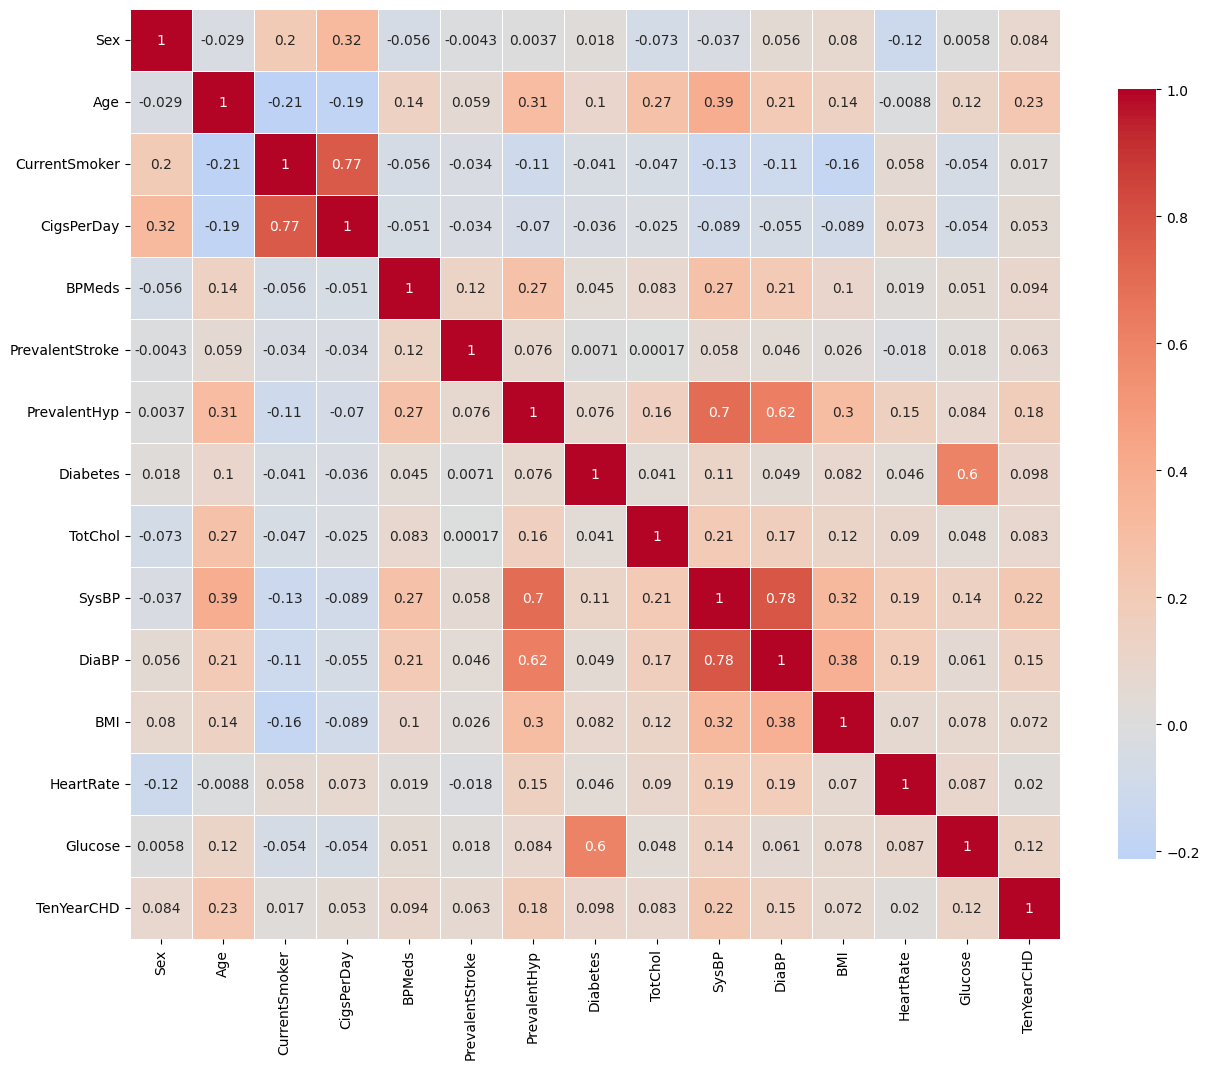

In [19]:
plt.figure(figsize=(15,20))
sns.heatmap(df.corr(),cmap='coolwarm', center=0, square=True, linewidths=.5,annot=True, cbar_kws={"shrink": .5})
plt.show()

From the above heatmap we see that:
- Variables 'currentSmoker' and 'cigsPerDay' are highly correlated.
-Variables 'sysBP' and 'diaBP' are highly correlated.
-From our histogram we can see that 'cigsPerDay' have more 0 values. Hence we can try and drop that column from our data.
-Also we know that 'sysBP' and 'diaBP' are supposed to be dependant on eachother,as they help in generating the blood pressure of paitents. So it is wise not to drop any of those columns.

3.6 Categorical Data Analysis¶


In [20]:
categorical_features = ['Sex', 'CurrentSmoker', 'BPMeds', 'PrevalentStroke', 'PrevalentHyp', 'Diabetes']

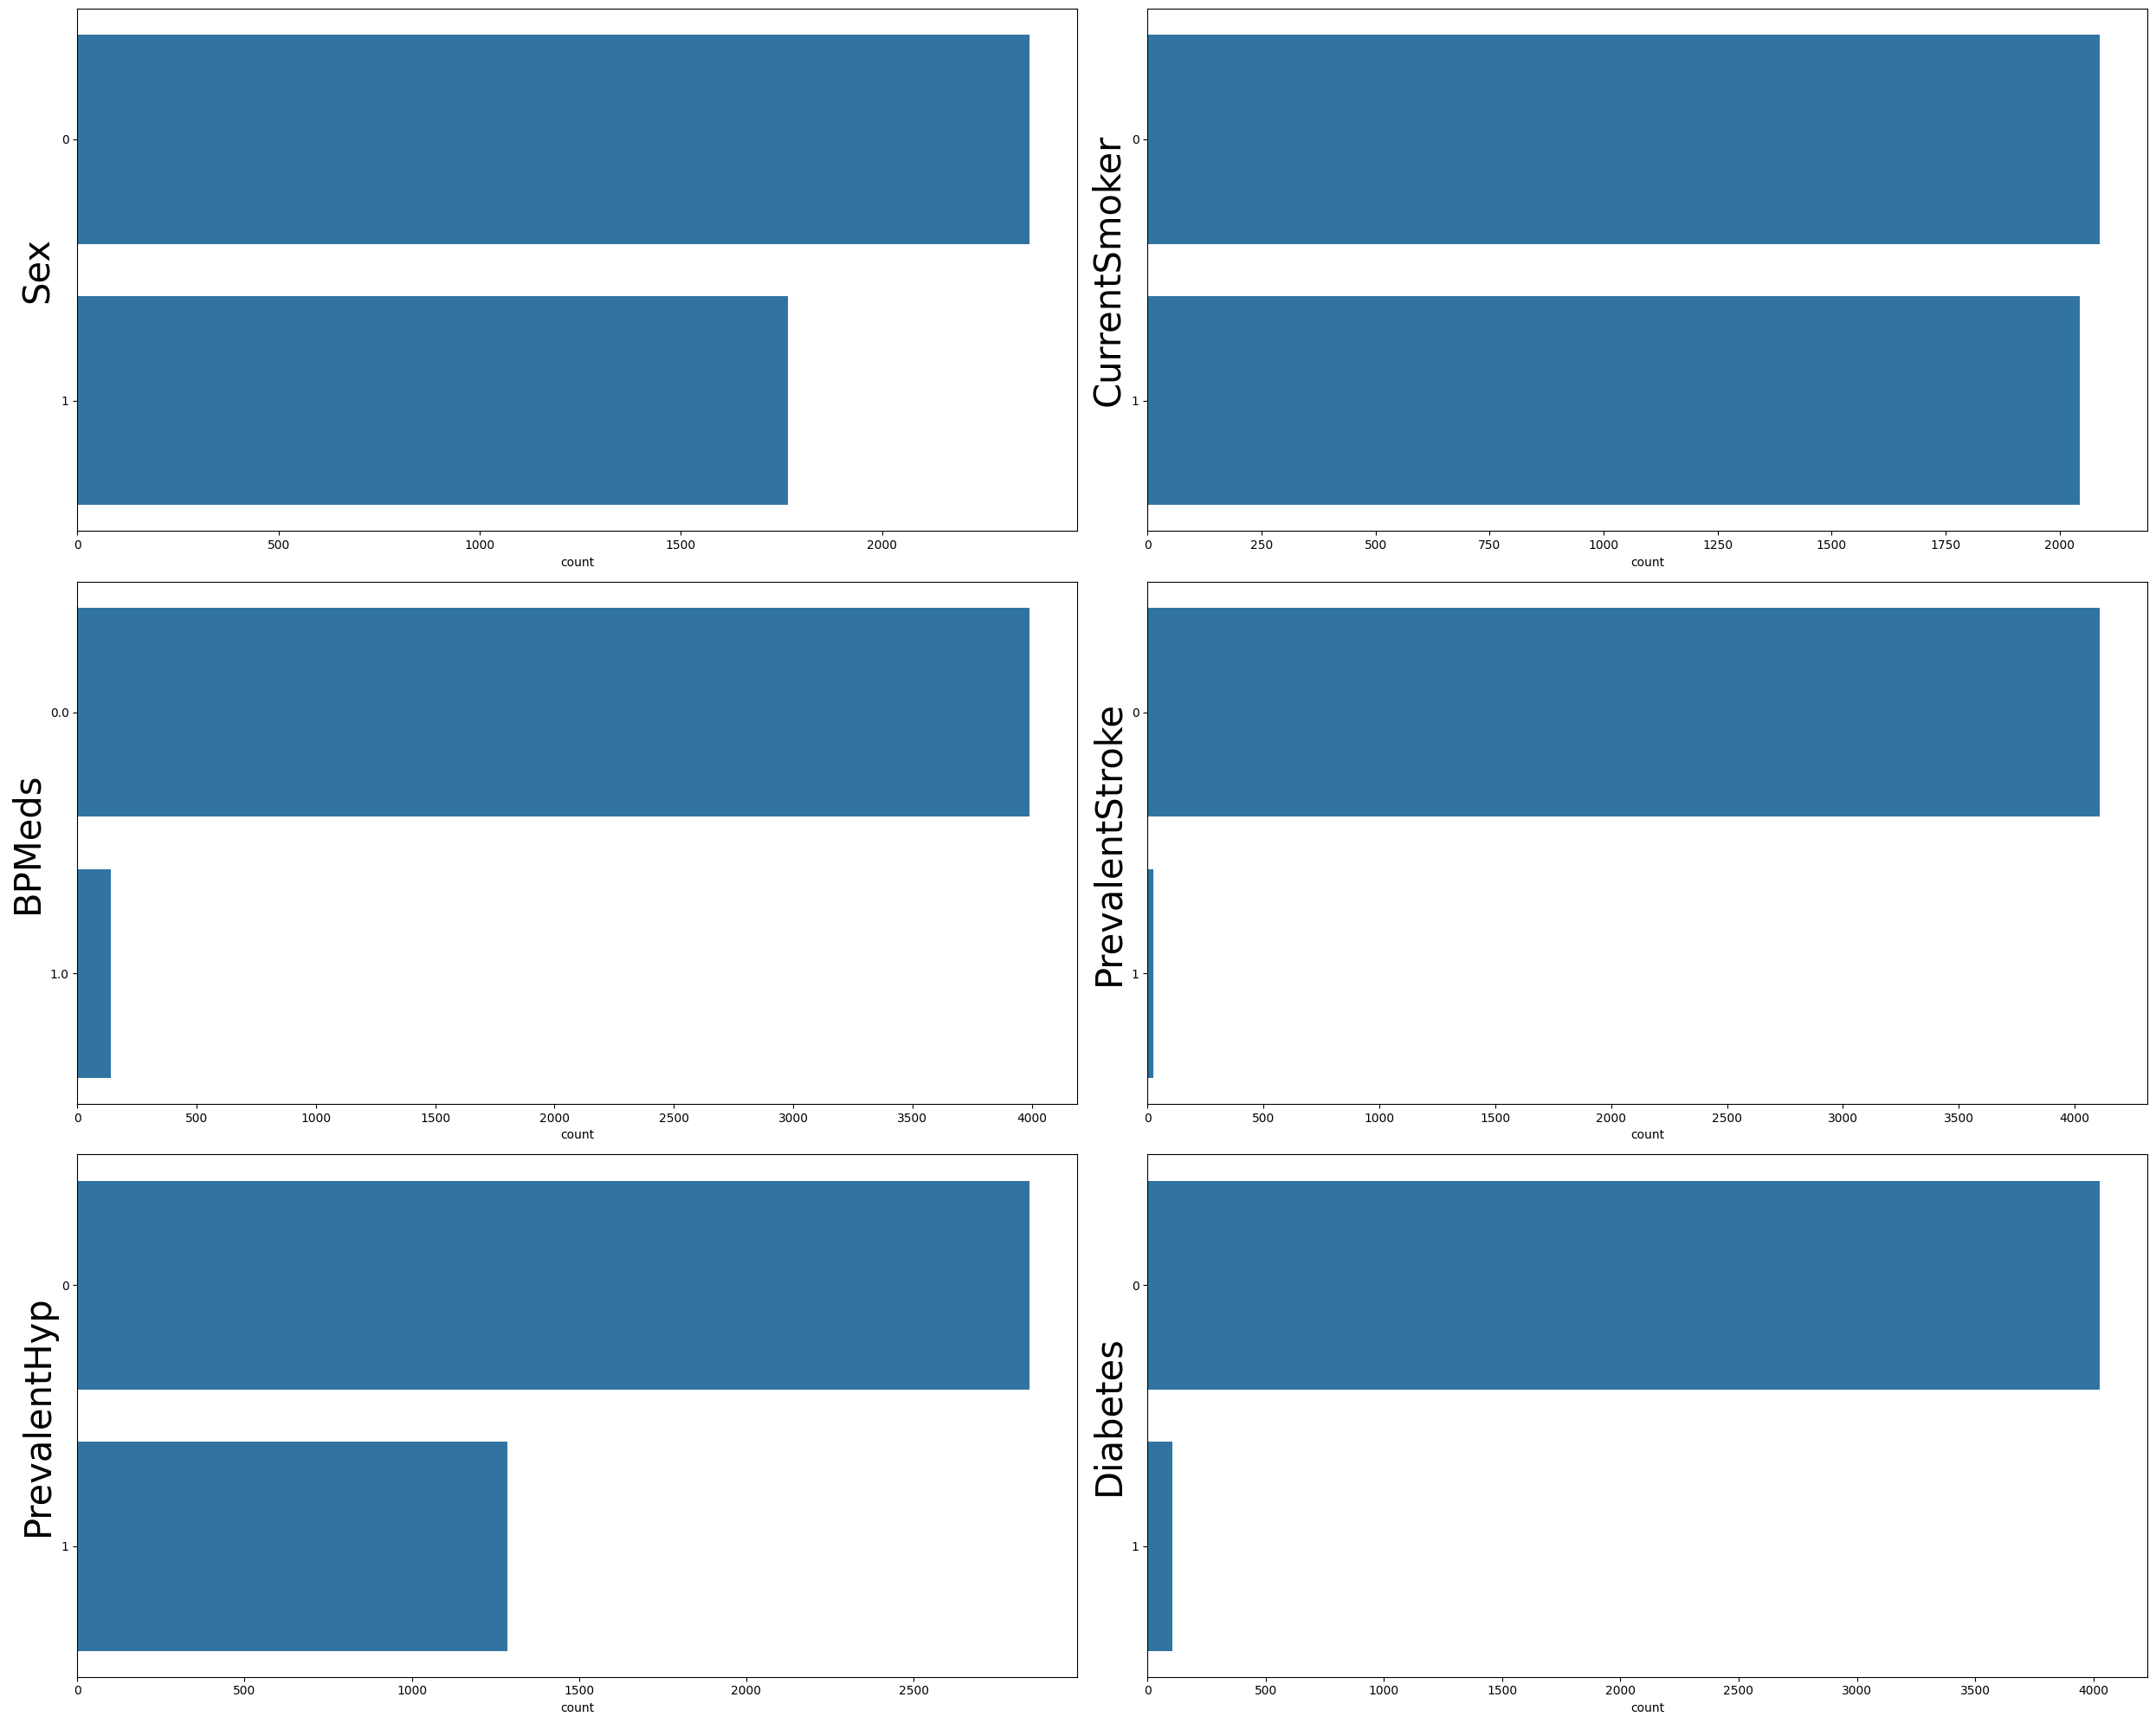

In [21]:
fig, ax = plt.subplots(3, 2, figsize=(25, 20))
for variable, subplot in zip(categorical_features, ax.flatten()):
    countplot = sns.countplot(y=df[variable], ax=subplot )
    countplot.set_ylabel(variable, fontsize = 30)
plt.tight_layout()
plt.show()

From the above plot we see that:
- The number of males are femals are not equal
BPmeds, prevalentStroke and diabetes are highly imbalanced.
- The number of Smokers and non-Smokers in currentSmoker is almost the same

3.7 Numerical Features analysis¶


In [22]:
numeric_features = ['CigsPerDay', 'TotChol', 'SysBP', 'DiaBP', 'BMI', 'HeartRate', 'Glucose']

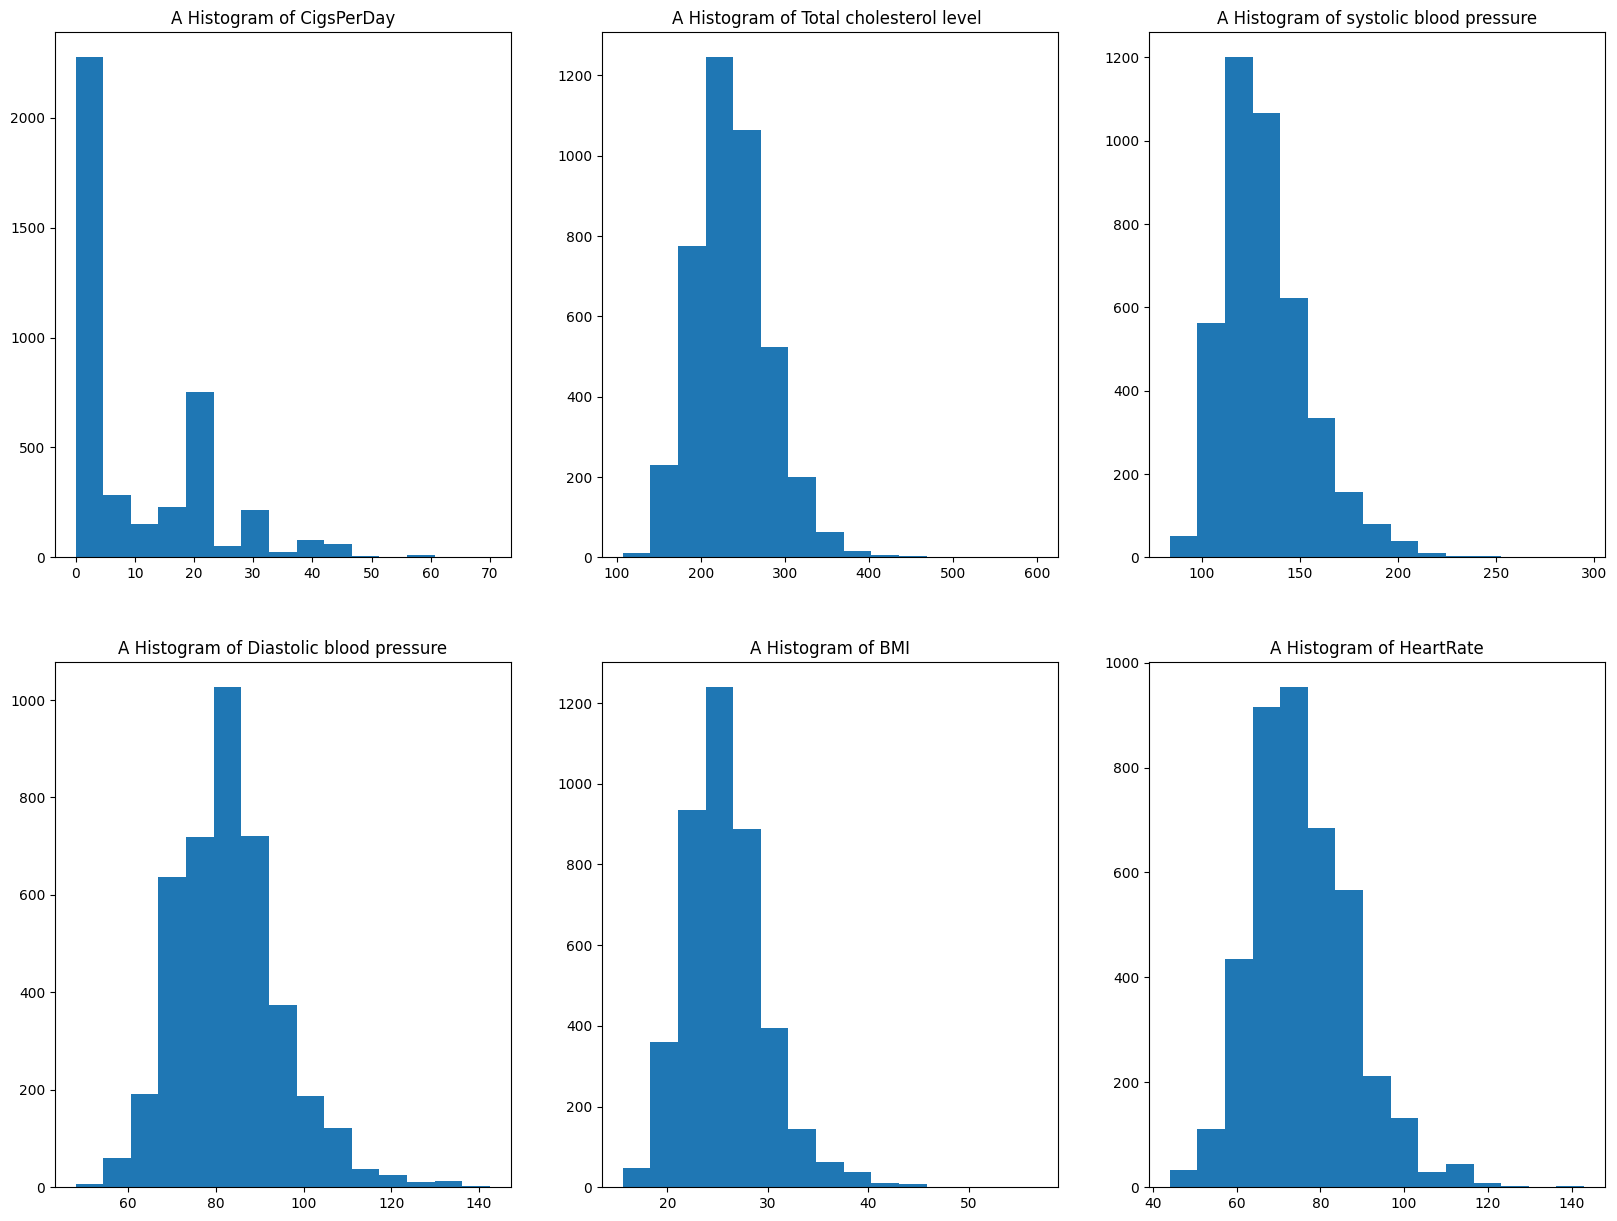

In [23]:
fig = plt.figure(figsize=(20, 15))
plt.subplot(2,3,1)
plt.hist(df['CigsPerDay'], bins = 15)
plt.title('A Histogram of CigsPerDay')

plt.subplot(2,3,2)
plt.hist(df['TotChol'], bins = 15)
plt.title('A Histogram of Total cholesterol level ')

plt.subplot(2,3,3)
plt.hist(df['SysBP'], bins = 15)
plt.title('A Histogram of systolic blood pressure')

plt.subplot(2,3,4)
plt.hist(df['DiaBP'], bins = 15)
plt.title('A Histogram of Diastolic blood pressure')

plt.subplot(2,3,5)
plt.hist(df['BMI'], bins = 15)
plt.title('A Histogram of BMI')

plt.subplot(2,3,6)
plt.hist(df['HeartRate'], bins = 15)
plt.title('A Histogram of HeartRate')

plt.show()

From the above plot we see that:
- totChol, sysBP, diaBPand BMI has an uniform distribution and the rest are unevenly distributed
- cigsPerDay has a highly uneven distribution with the most data present in 0
- cigsPerDay and sysBP shows quite a bit and slight right skewness respectively
- cigsPerDay has uneven distribution although most of the data is concentrated on 0

For the same numerical features: The majority portions of the following columns lie in the range: totChol: 150 to 300 sysBP: 100 to 150 diaBP: 60 to 100 BMI: 20 to 30 heartRate: 50 to 100 glucose: 50 to 150

 Analysis with Target Variable

In [25]:
print("The average person with 10-year risk of future coronary heart disease (CHD) {:.4f} ".format(df['TenYearCHD'].mean()))

The average person with 10-year risk of future coronary heart disease (CHD) 0.1519 


In [28]:
# f,ax=plt.subplots(1,2,figsize=(18,8))
# df['TenYearCHD'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
# ax[0].set_title('TenYearCHD')
# ax[0].set_ylabel('')
# sns.countplot('TenYearCHD',data=df,ax=ax[1])
# ax[1].set_title('TenYearCHD')
# plt.show()

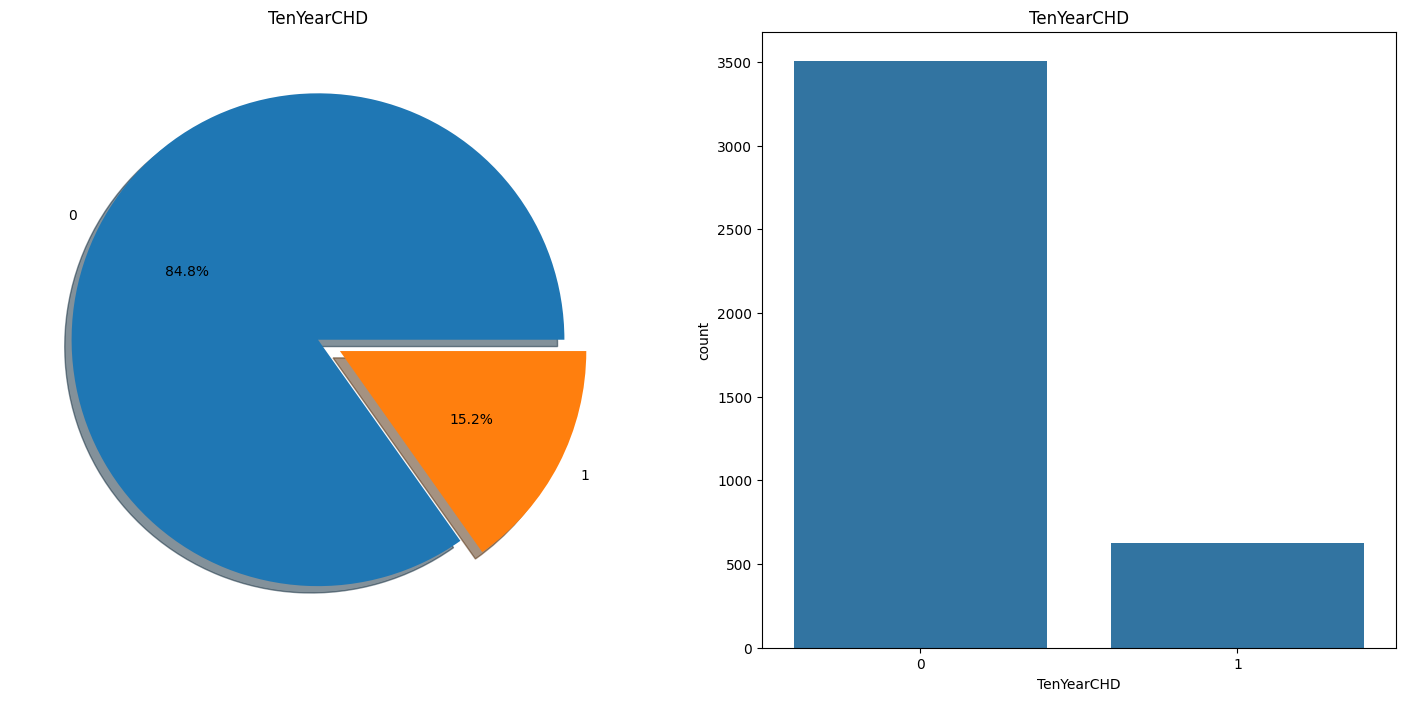

In [27]:
f,ax=plt.subplots(1,2,figsize=(18,8))
df['TenYearCHD'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('TenYearCHD')
ax[0].set_ylabel('')

# Use sns.countplot with the correct 'data' argument
sns.countplot(x='TenYearCHD', data=df, ax=ax[1])  # Specify 'x' and use the DataFrame 'df'

ax[1].set_title('TenYearCHD')
plt.show()


The distribution is highly imbalanced. As in, the number of negative cases outweigh the number of positive cases. This would lead to class imbalance problem while fitting our models. Therefore, this problem needs to be addressed and taken care of.

 Relationship between other variables and target variable

In [29]:
print('Oldest patient was of:',df['Age'].max(),'Years')
print('Youngest patient was of:',df['Age'].min(),'Years')
print('Average Age of the patient:',df['Age'].mean(),'Years')

Oldest patient was of: 70 Years
Youngest patient was of: 32 Years
Average Age of the patient: 49.55722235664167 Years


In [31]:
# fig, ax = plt.subplots(figsize =(9, 7))
# sns.violinplot("Sex","Age", hue="TenYearCHD", data=df,split=True)
# ax.set_title('Sex and Age vs TenYearCHD')
# ax.set_yticks(range(0,110,10))
# plt.show()

In [36]:
# fig, ax = plt.subplots(figsize =(9, 7))
# sns.violinplot("Sex","Age", hue="TenYearCHD", data=df,split=True, ax=ax) # Pass ax here
# ax.set_title('Sex and Age vs TenYearCHD')
# ax.set_yticks(range(0,110,10))
# plt.show()

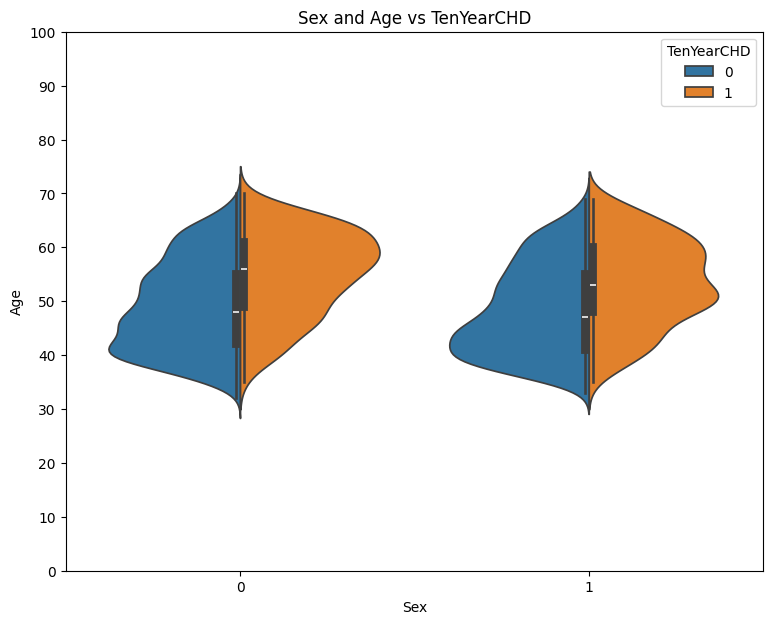

In [35]:
# Assuming df is your DataFrame
fig, ax = plt.subplots(figsize=(9, 7))
sns.violinplot(x="Sex", y="Age", hue="TenYearCHD", data=df, split=True, ax=ax)  # Use keyword arguments explicitly
ax.set_title('Sex and Age vs TenYearCHD')
ax.set_yticks(range(0, 110, 10))
plt.show()

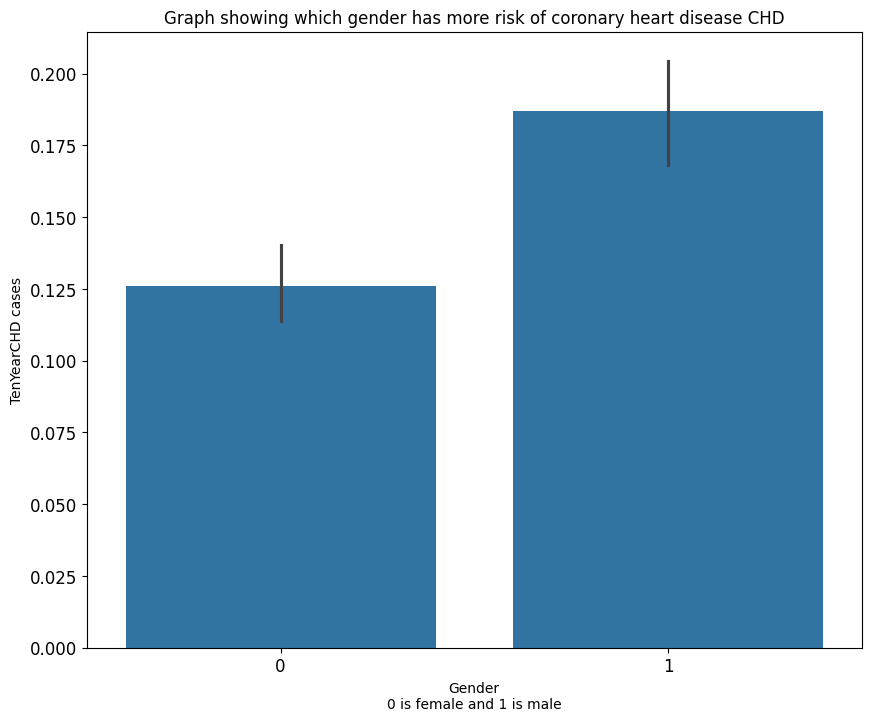

In [37]:
plt.figure(figsize=(10,8), facecolor='w')
sns.barplot(x=df["Sex"], y=df["TenYearCHD"])
plt.title("Graph showing which gender has more risk of coronary heart disease CHD")
plt.xlabel("Gender\n0 is female and 1 is male")
plt.ylabel("TenYearCHD cases")
plt.xticks(size=12)
plt.yticks(size=12)
plt.show()

From the above graph, we can see that the males have shown a slighly higher risk of coronary heart disease TenYearCHD.

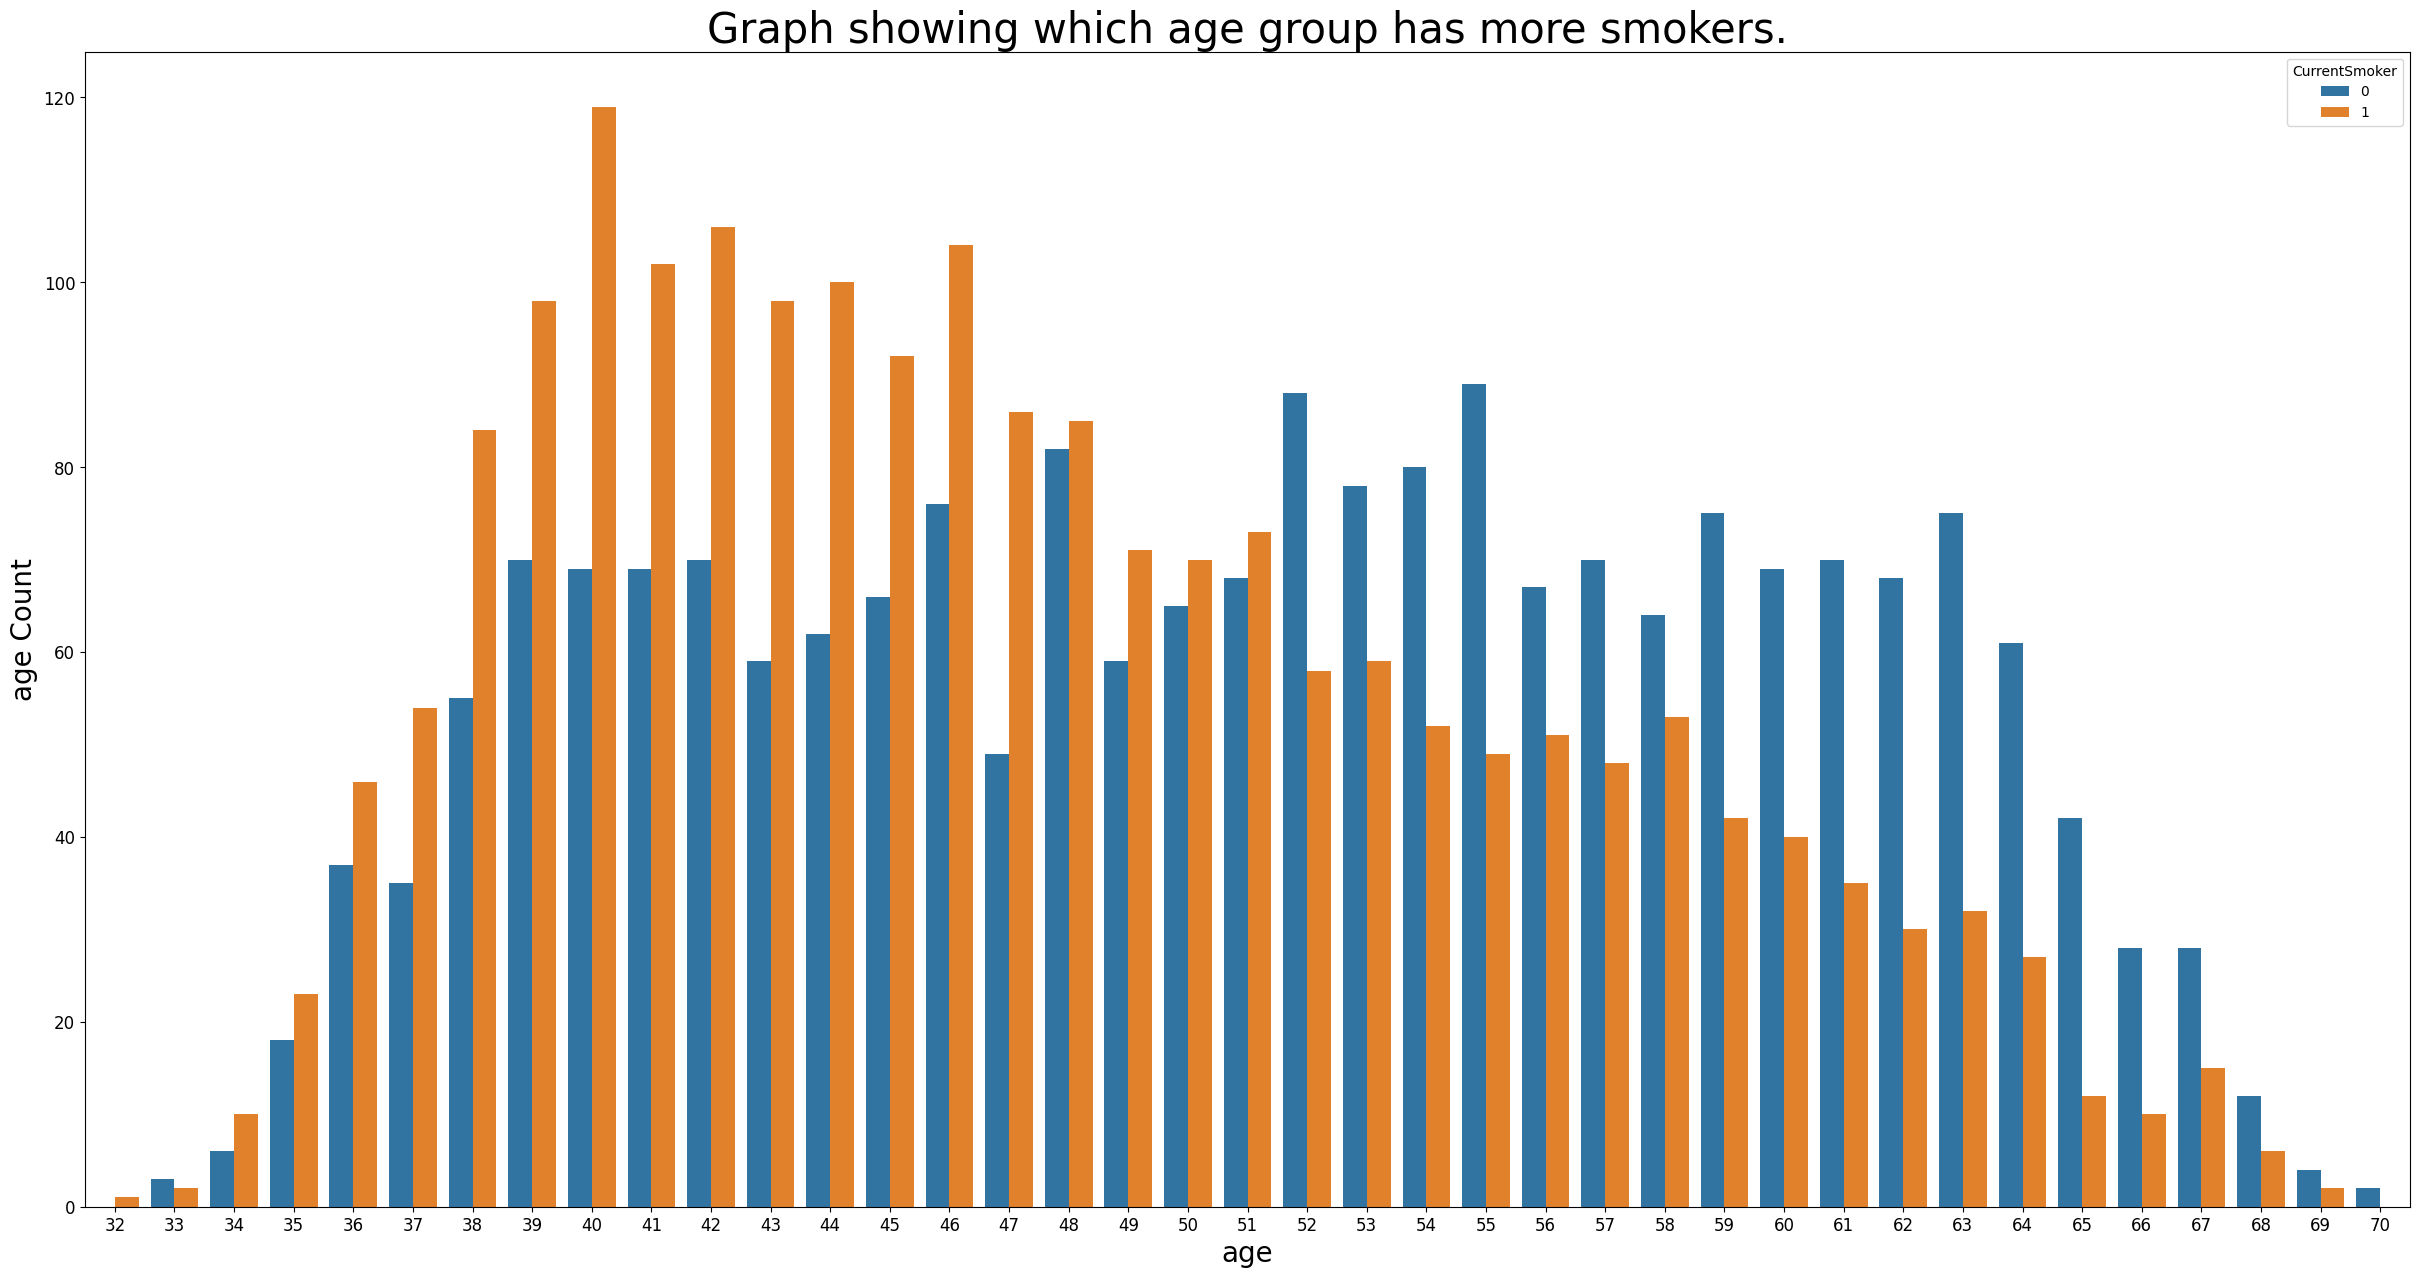

In [38]:
plt.figure(figsize=(30,15), facecolor='w')
sns.countplot(x="Age",data=df,hue="CurrentSmoker")
plt.title("Graph showing which age group has more smokers.", size=30)
plt.xlabel("age", size=20)
plt.ylabel("age Count", size=20)
plt.xticks(size=12)
plt.yticks(size=12)
plt.show()


From the above plot we see that:
- we can say between 35-50 age , the risk of having CHD is more
-No currentSmokers observed below the age of 32
-plt.figure(figsize=(30,12), facecolor='w')
sns.countplot(x="TenYearCHD",data=df,hue="CigsPerDay")
plt.legend(title='CigsPerDay', fontsize='large')
plt.title("Graph showing the relation between cigsPerDay and risk of coronary heart disease.", size=30)
plt.xlabel("Risk of TenYearCHD", size=20)
plt.ylabel("Count of TenYearCHD", size=20)
plt.xticks(size=12)
plt.yticks(size=12)
plt.show(maximum age for a currentSmokers is 70

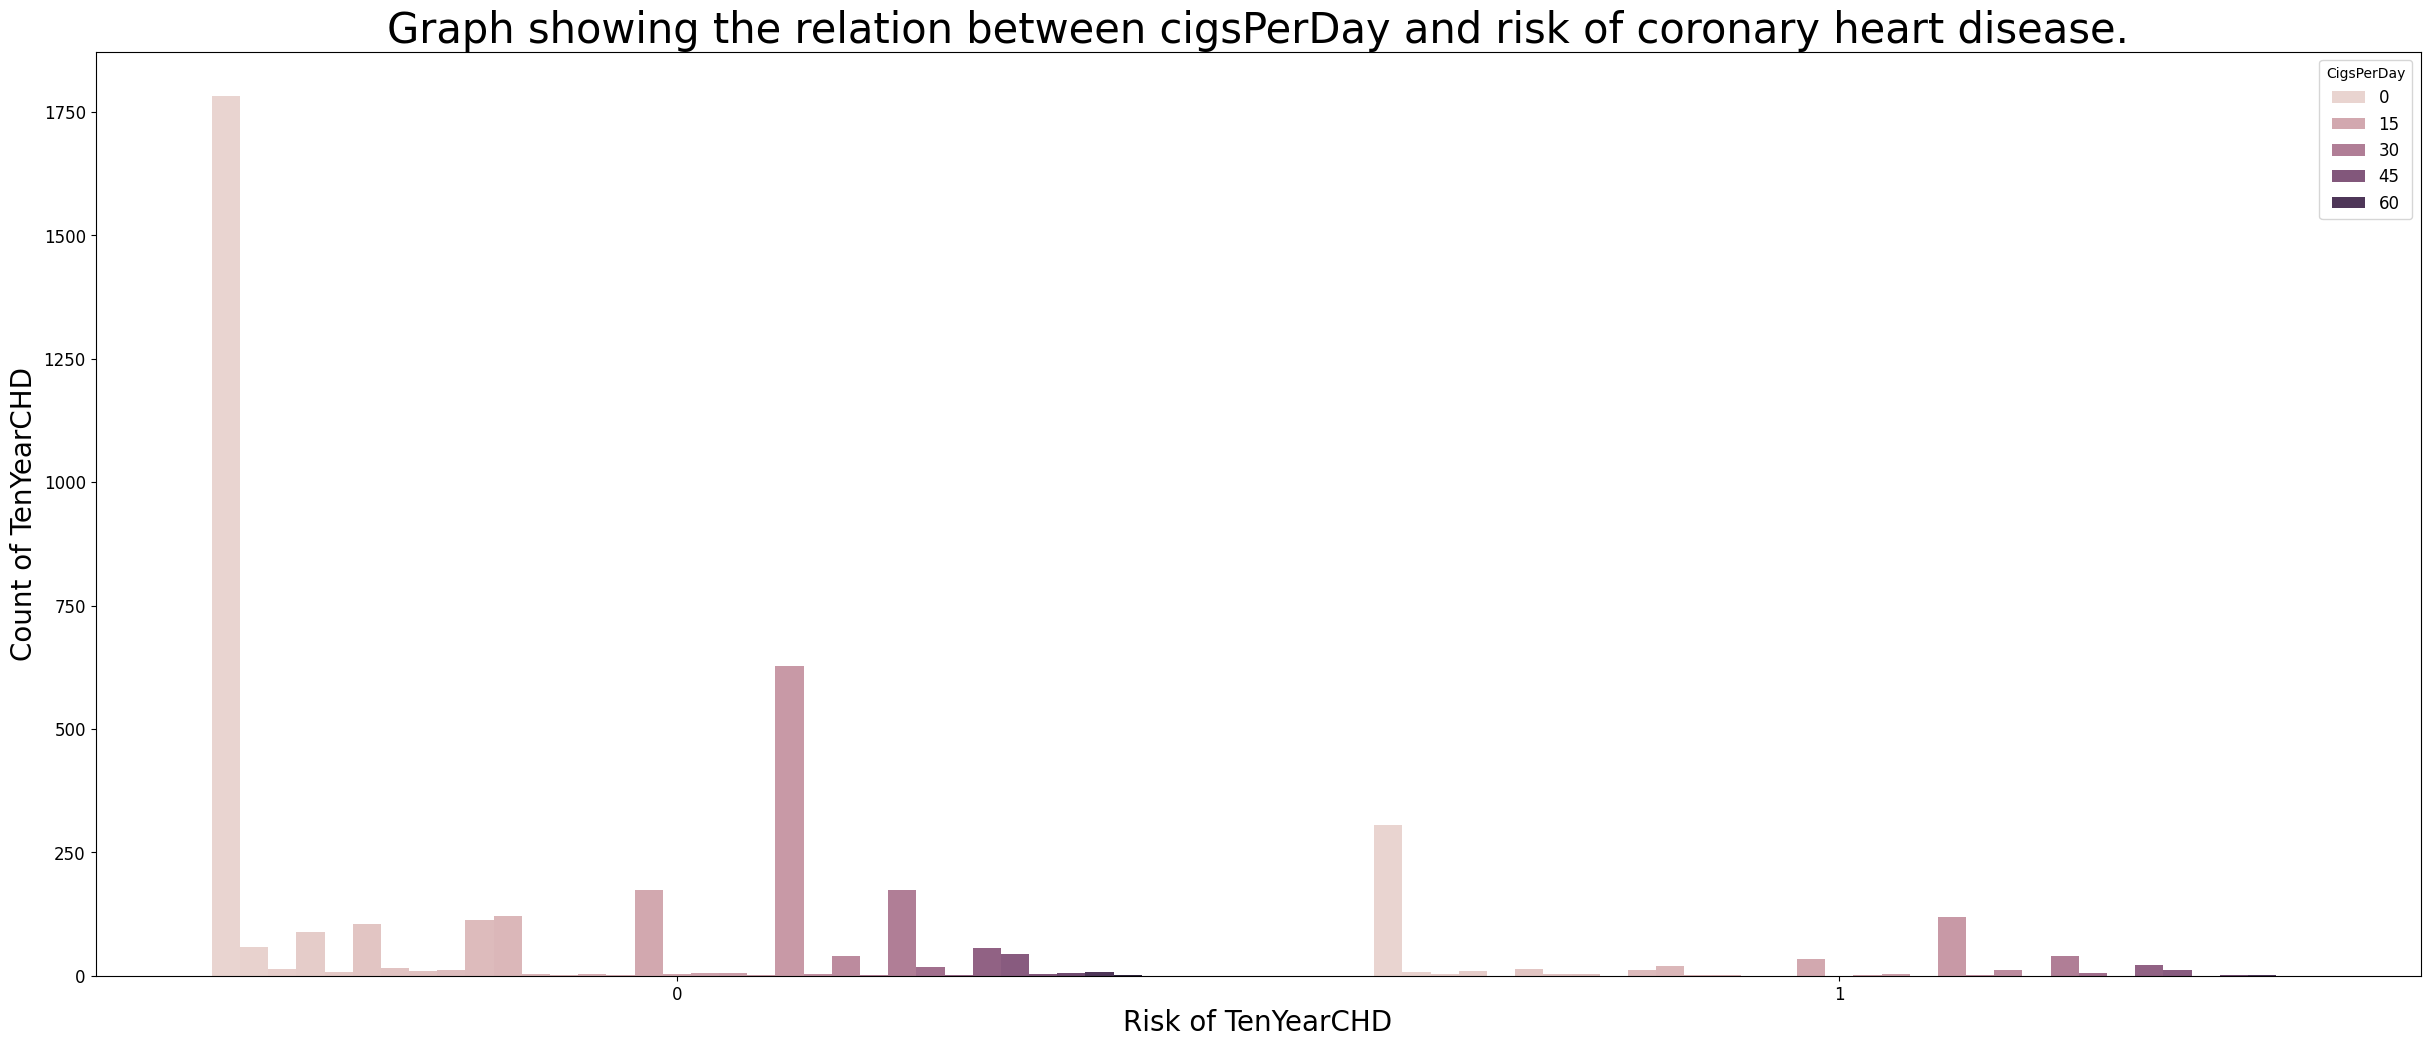

In [40]:
plt.figure(figsize=(30,12), facecolor='w')
sns.countplot(x="TenYearCHD",data=df,hue="CigsPerDay")
plt.legend(title='CigsPerDay', fontsize='large')
plt.title("Graph showing the relation between cigsPerDay and risk of coronary heart disease.", size=30)
plt.xlabel("Risk of TenYearCHD", size=20)
plt.ylabel("Count of TenYearCHD", size=20)
plt.xticks(size=12)
plt.yticks(size=12)
plt.show()


From the above plot we see that:
- Low cigsPerDay comes with lower risk of CHD.
-Those who don't smoke, i.e., with a cigsPerDay of 0.0 has a really low risk of contracting the disease
-Although that is the case, low cigsPerDay doesn't actually guarantee a much lower risk of CHD

<Figure size 1200x800 with 0 Axes>

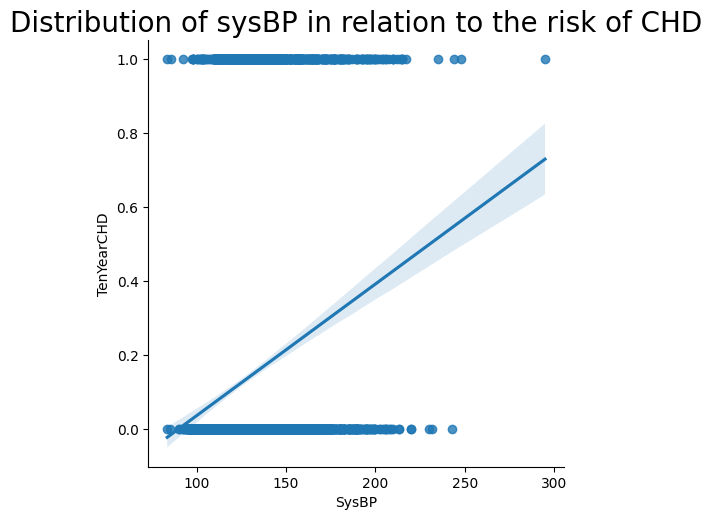

In [41]:
plt.figure(figsize=(12,8), facecolor='w')
sns.lmplot(data=df, x="SysBP", y="TenYearCHD")
plt.title("Distribution of sysBP in relation to the risk of CHD", size=20)
plt.show()


From the above plot we see that:
- Minor relation of higher risk of TenYearCHD found with higher sysBP
-Majority of people with sysBP ranging from 72 - 130 has lower chance of contracting the disease

<Figure size 1200x800 with 0 Axes>

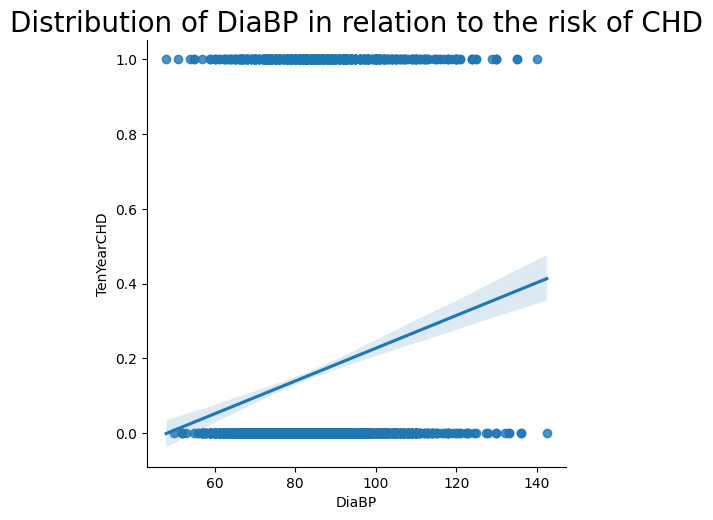

In [42]:
plt.figure(figsize=(12,8), facecolor='w')
sns.lmplot(data=df, x="DiaBP", y="TenYearCHD")
plt.title("Distribution of DiaBP in relation to the risk of CHD", size=20)
plt.show()

From the above plot we see that:
- Minor relation found between higher risk of TenYearCHD with higher diaBP similar to the previous one
-Majority of people with diaBP ranging upto 80.0 has lower chance of contracting the disease.

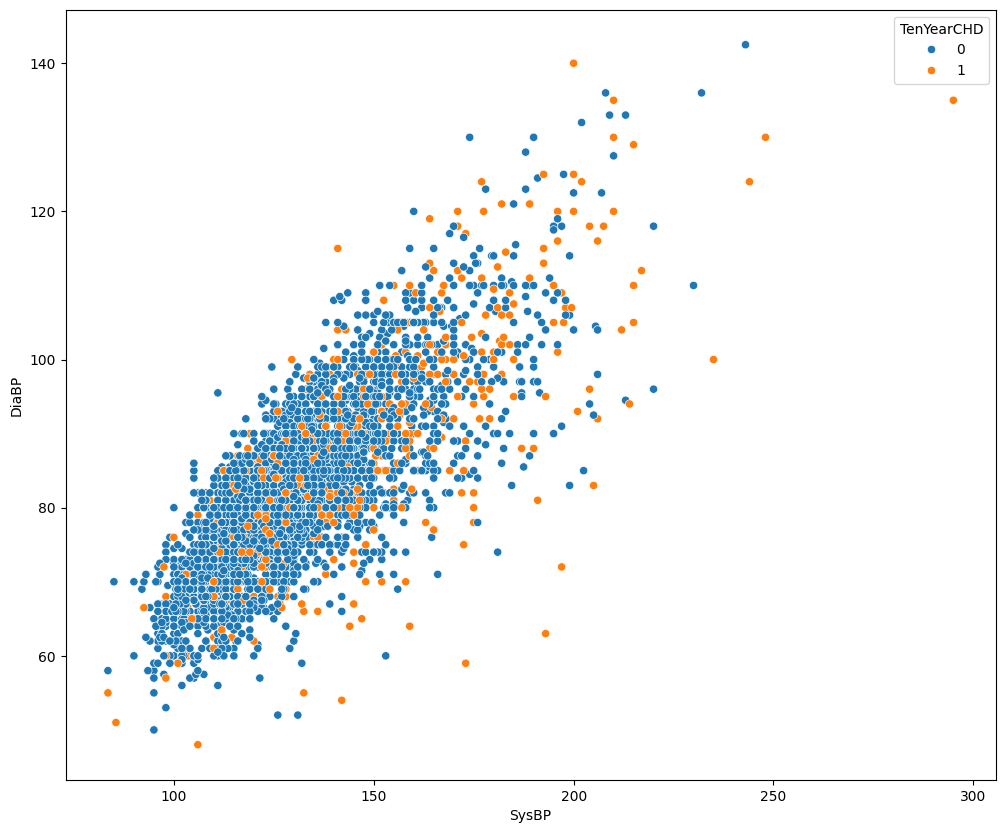

In [43]:
plt.figure(figsize=(12,10), facecolor='w')
sns.scatterplot(data=df, x="SysBP", y="DiaBP", hue="TenYearCHD")
plt.show()

Discover Outliers

An outlier is an observation that appears to deviate distinctly from other observations in the data. If the outliers are not removed, the model accuracy may decrease.

In order to detect outliers in numerical data, we perform the following:

- Plot boxplot for numerical data
-Note the variables for which outliers are present
-Remove outliers by IQR method
-Plot boxplot to recheck for outliers

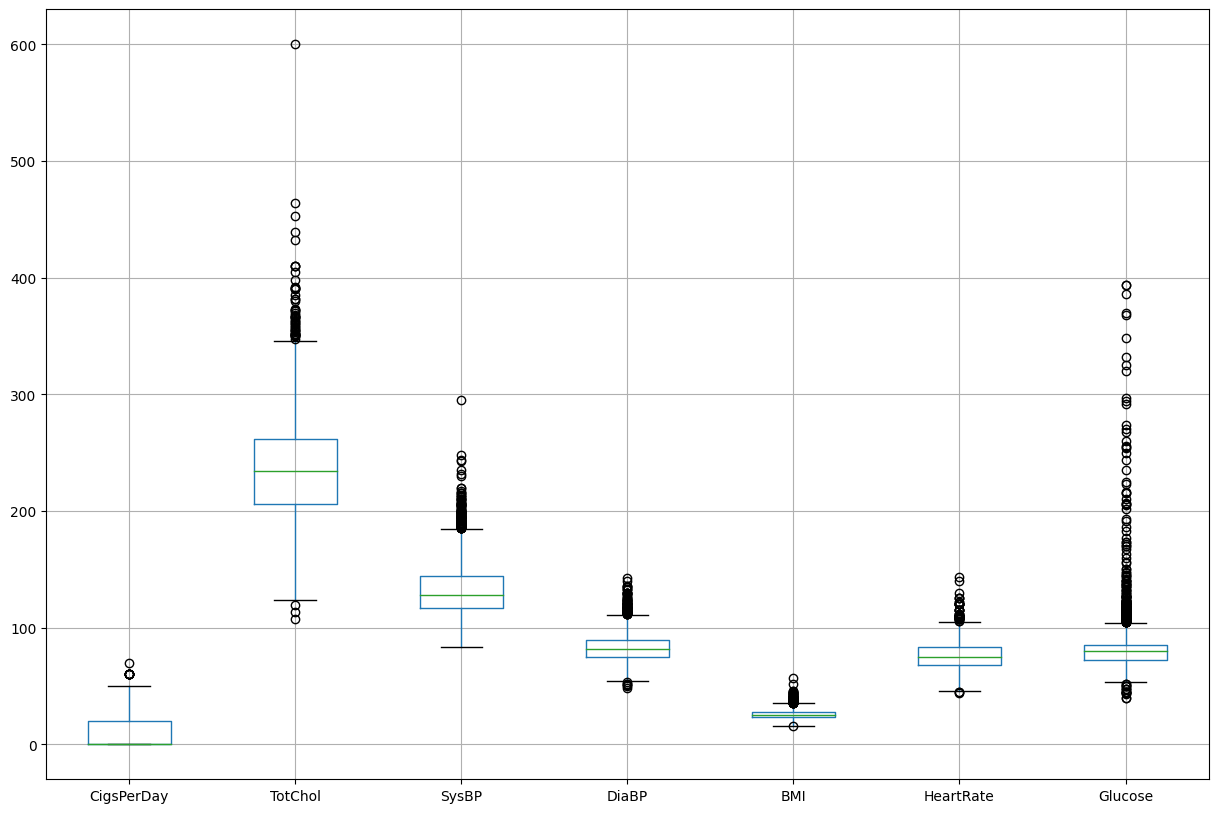

In [44]:
plt.figure(figsize = (15,10))
df.boxplot(column = ['CigsPerDay', 'TotChol', 'SysBP', 'DiaBP', 'BMI', 'HeartRate', 'Glucose'])
plt.show()

From the above plot we see that:

We have outliers in the following columns:
- cigsPerDay, totChol, sysBP, diaBP, BMI, heartRate, glucose
-Out of them we have extremities in 'totChol' and 'sysBP' the rest of the outliers are close to the upper whisker which are considerable.
-As the assumption states that there should be no outliers in our data. We will try to manipulate the data to fit in our range

Removing the Outliers

In [46]:
# calculate interquartile range

# compute the first quartile using quantile(0.25)
# use .drop() to drop the target variable
# axis=1: specifies that the labels are dropped from the columns
q1 = df.drop('TenYearCHD', axis = 1).quantile(0.25)

# compute the first quartile using quantile(0.75)
# use .drop() to drop the target variable
# axis=1: specifies that the labels are dropped from the columns
q3 = df.drop('TenYearCHD', axis = 1).quantile(0.75)

# calculate of interquartile range
IQR = q3 - q1

LL = q1 - 1.5 * IQR
UL = q3 + 1.5 * IQR

# Reset index of LL and UL to match df
LL = LL.reindex(df.columns, fill_value=-np.inf)  # Fill missing values with negative infinity
UL = UL.reindex(df.columns, fill_value=np.inf)   # Fill missing values with positive infinity

df = df[~((df < LL) | (df > UL)).any(axis = 1)]

Checking if the outliers are removed

In [47]:
df.shape

(3435, 15)

Plot boxplot to recheck for outliers


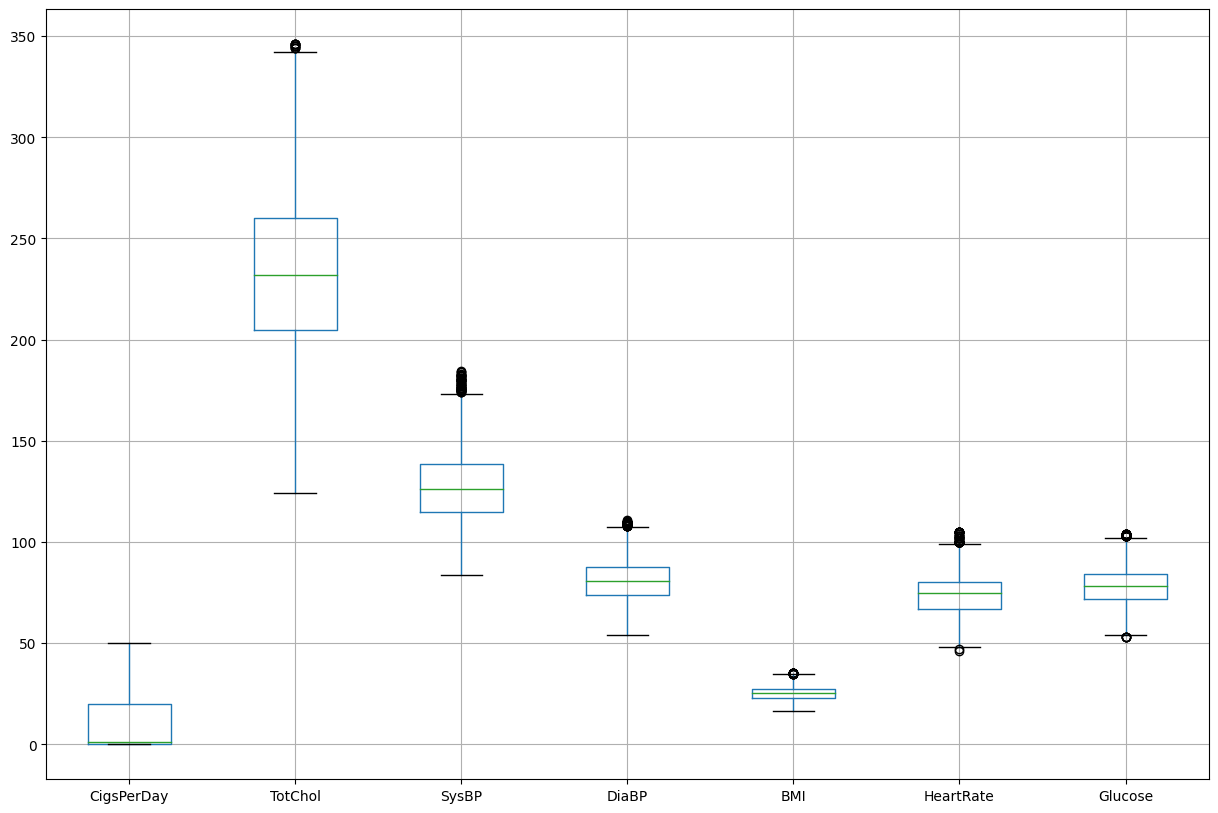

In [48]:
plt.figure(figsize = (15,10))
df.boxplot(column = ['CigsPerDay', 'TotChol', 'SysBP', 'DiaBP', 'BMI', 'HeartRate', 'Glucose'])
plt.show()

Observing the range of the boxplot, we say that the outliers are removed from the original data. The new 'outliers' that we see are moderate outliers that lie within the min/max range before removing the actual outliers

## Recheck the Correlation
Recheck the correlation after treating outliers. An outlier might either decrease or increase a correlation coefficient, depending on where it is in relation to the other points

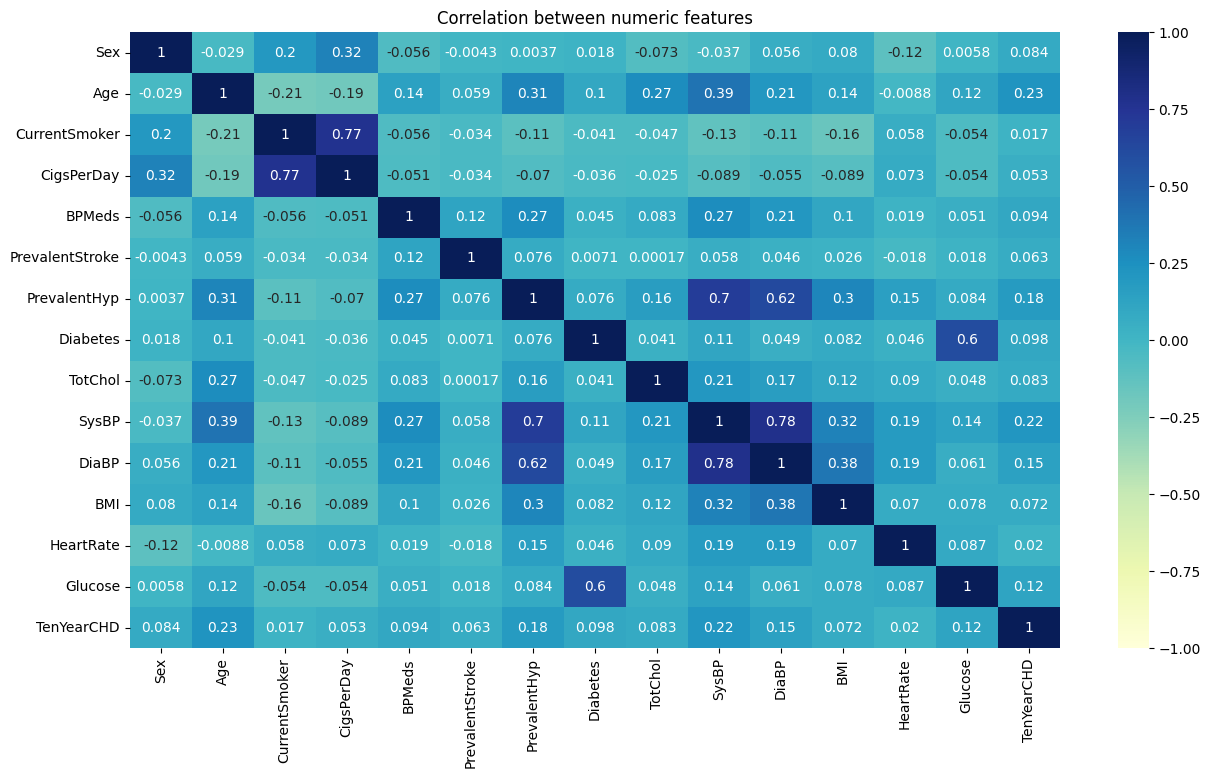

In [49]:
# set the figure size
plt.figure(figsize=(15, 8))

sns.heatmap(corr, cmap='YlGnBu', vmax=1.0, vmin=-1.0, annot = True)

# specify name of the plot
plt.title('Correlation between numeric features')

# display the plot
plt.show()

Base Model Making

In [50]:
X = df.drop('TenYearCHD', axis = 1)
y = df['TenYearCHD']

Naive Bayes

Naïve Bayes Classification is based on the probability of occurrences of the output.

It assumes that every feature is independent and calculates the relative occurrence of the output for given input based on the output dependency on the given independent attributes.

In [51]:
from sklearn.datasets import make_classification
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import chi2
from matplotlib import pyplot

In [52]:
ss = StandardScaler()
X_s = ss.fit_transform(X)

X_s = pd.DataFrame(X_s, columns = X.columns)

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X_s, y, test_size = 0.3, random_state = 10)

In [54]:
nb = GaussianNB()
nb.fit(X_train, y_train)

GaussianNB()

In [55]:
y_pred = nb.predict(X_test)

confusion_matrix(y_test, y_pred)

array([[810,  73],
       [115,  33]])

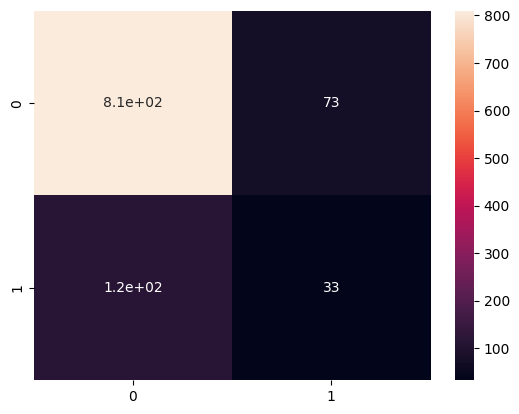

In [56]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot = True)
plt.show()

In [57]:
y_prob = nb.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_prob)


thresholds[0] = thresholds[0] - 1

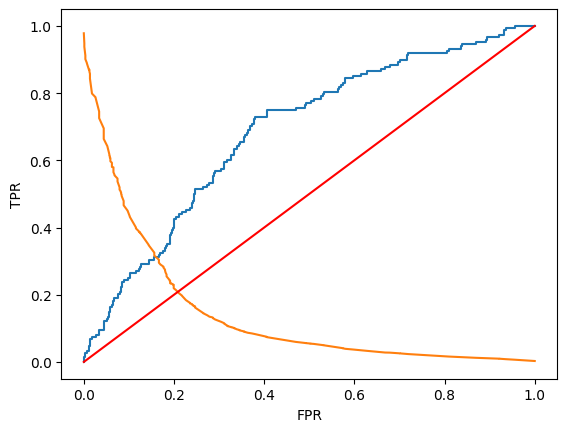

In [58]:
plt.plot(fpr,tpr)
plt.plot(fpr,thresholds)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.plot(fpr,fpr,color='r')
plt.show()

In [59]:
y_train_pred = nb.predict(X_train)
y_train_prob = nb.predict_proba(X_train)[:, 1]

roc_sc_train_NB = roc_auc_score(y_train, y_train_prob)
acc_train_NB = accuracy_score(y_train, y_train_pred)
prec_train_NB = precision_score(y_train, y_train_pred)
f1_train_NB = f1_score(y_train, y_train_pred)
recall_train_NB = recall_score(y_train, y_train_pred)

print("Train Set: ")
print("ROC Score: ", roc_sc_train_NB)
print("Accuracy Score: ", acc_train_NB)


y_test_pred = nb.predict(X_test)
y_test_prob = nb.predict_proba(X_test)[:, 1]

roc_sc_test_NB = roc_auc_score(y_test, y_test_prob)
acc_test_NB = accuracy_score(y_test, y_test_pred)
f1_test_NB = f1_score(y_test, y_test_pred)
recall_test_NB = recall_score(y_test, y_test_pred)
prec_test_NB = precision_score(y_test, y_test_pred)

print("Test Set: ")
print("ROC Score: ", roc_sc_test_NB)
print("Accuracy Score: ", acc_test_NB)

Train Set: 
ROC Score:  0.7023910186039969
Accuracy Score:  0.8257071547420965
Test Set: 
ROC Score:  0.6868323589727894
Accuracy Score:  0.8176527643064986


Here you can see that our model is overfitting.

KNeighborsClassifier
KNN belongs to the class of supervised learning. It is also known as a lazy learning classifier.

This algorithm does not construct the model from the data.

It classifies the input based on its nearest k training instances and decides its class based on the similarity of the k nearest neighbors it uses Euclidean distance to calculate the distance of an attribute from its neighbors

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X_s, y, test_size = 0.3, random_state = 10)

In [61]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [62]:
y_train_pred = knn.predict(X_train)
y_train_prob = knn.predict_proba(X_train)[:, 1]

roc_sc_train_KNN = roc_auc_score(y_train, y_train_prob)
acc_train_KNN = accuracy_score(y_train, y_train_pred)
prec_train_KNN = precision_score(y_train, y_train_pred)
f1_train_KNN = f1_score(y_train, y_train_pred)
recall_train_KNN = recall_score(y_train, y_train_pred)

print("Train Set: ")
print("ROC Score: ", roc_sc_train_KNN)
print("Accuracy Score: ", acc_train_KNN)


y_test_pred = knn.predict(X_test)
y_test_prob = knn.predict_proba(X_test)[:, 1]

roc_sc_test_KNN = roc_auc_score(y_test, y_test_prob)
acc_test_KNN = accuracy_score(y_test, y_test_pred)
f1_test_KNN = f1_score(y_test, y_test_pred)
recall_test_KNN = recall_score(y_test, y_test_pred)
prec_test_KNN = precision_score(y_test, y_test_pred)

print("Test Set: ")
print("ROC Score: ", roc_sc_test_KNN)
print("Accuracy Score: ", acc_test_KNN)

Train Set: 
ROC Score:  0.8881666486129053
Accuracy Score:  0.8856073211314476
Test Set: 
ROC Score:  0.6045537326681155
Accuracy Score:  0.8467507274490785


Tuning using GridSearchCV

In [63]:
knn = KNeighborsClassifier()

param = {'n_neighbors': np.arange(1, 25, 2),
         'metric': ['hamming','euclidean','manhattan','Chebyshev']}

gsearch = GridSearchCV(estimator = knn, param_grid = param, cv = 3, scoring = 'accuracy', n_jobs=-1)

gsearch.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
36 fits failed out of a total of 144.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
21 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py", line 213, in fit
    self._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 600, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/skl

GridSearchCV(cv=3, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'metric': ['hamming', 'euclidean', 'manhattan',
                                    'Chebyshev'],
                         'n_neighbors': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23])},
             scoring='accuracy')

In [64]:
gsearch.best_params_

{'metric': 'hamming', 'n_neighbors': 15}

In [65]:
knn = KNeighborsClassifier(**gsearch.best_params_)
knn.fit(X_train, y_train)

KNeighborsClassifier(metric='hamming', n_neighbors=15)

In [66]:
y_train_pred = knn.predict(X_train)
y_train_prob = knn.predict_proba(X_train)[:, 1]

roc_sc_train_KNN_GSCV = roc_auc_score(y_train, y_train_prob)
acc_train_KNN_GSCV = accuracy_score(y_train, y_train_pred)
prec_train_KNN_GSCV = precision_score(y_train, y_train_pred)
f1_train_KNN_GSCV = f1_score(y_train, y_train_pred)
recall_train_KNN_GSCV = recall_score(y_train, y_train_pred)

print("Train Set: ")
print("ROC Score: ", roc_sc_train_KNN_GSCV)
print("Accuracy Score: ", acc_train_KNN_GSCV)


y_test_pred = knn.predict(X_test)
y_test_prob = knn.predict_proba(X_test)[:, 1]

roc_sc_test_KNN_GSCV = roc_auc_score(y_test, y_test_prob)
acc_test_KNN_GSCV = accuracy_score(y_test, y_test_pred)
f1_test_KNN_GSCV = f1_score(y_test, y_test_pred)
recall_test_KNN_GSCV = recall_score(y_test, y_test_pred)
prec_test_KNN_GSCV = precision_score(y_test, y_test_pred)

print("Test Set: ")
print("ROC Score: ", roc_sc_test_KNN_GSCV)
print("Accuracy Score: ", acc_test_KNN_GSCV)

Train Set: 
ROC Score:  0.7721814710204794
Accuracy Score:  0.877287853577371
Test Set: 
ROC Score:  0.5722047075387959
Accuracy Score:  0.8554801163918526


Logistic Regression-
Logistic regression is a supervised learning algorithm.

It is a go-to algorithm for binary classification problems.

It is used when our data is not linearly separable and used to assign observations to a discrete set of classes in this algorithm; we use the sigmoid function for mapping our predictions to probabilities

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X_s, y, test_size = 0.3, random_state = 10)

In [68]:
lr = LogisticRegression(solver = 'liblinear')
lr.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

In [69]:
y_train_pred = lr.predict(X_train)
y_train_prob = lr.predict_proba(X_train)[:, 1]

roc_sc_train_LR = roc_auc_score(y_train, y_train_prob)
acc_train_LR = accuracy_score(y_train, y_train_pred)
prec_train_LR = precision_score(y_train, y_train_pred)
f1_train_LR = f1_score(y_train, y_train_pred)
recall_train_LR = recall_score(y_train, y_train_pred)

print("Train Set: ")
print("ROC Score: ", roc_sc_train_LR)
print("Accuracy Score: ", acc_train_LR)


y_test_pred = lr.predict(X_test)
y_test_prob = lr.predict_proba(X_test)[:, 1]

roc_sc_test_LR = roc_auc_score(y_test, y_test_prob)
acc_test_LR = accuracy_score(y_test, y_test_pred)
f1_test_LR = f1_score(y_test, y_test_pred)
recall_test_LR = recall_score(y_test, y_test_pred)
prec_test_LR = precision_score(y_test, y_test_pred)

print("Test Set: ")
print("ROC Score: ", roc_sc_test_LR)
print("Accuracy Score: ", acc_test_LR)

Train Set: 
ROC Score:  0.7295816000375086
Accuracy Score:  0.8793677204658902
Test Set: 
ROC Score:  0.7040647669186741
Accuracy Score:  0.8545101842870999


Evaluation Metrics¶


In [70]:
Base_Model = pd.DataFrame({'Accuracy_Train': [roc_sc_train_NB, roc_sc_train_KNN, roc_sc_train_KNN_GSCV, roc_sc_train_LR],
                   'AUC_Train': [acc_train_NB, acc_train_KNN, acc_train_KNN_GSCV, acc_train_LR],
                   'F1_Score_Train': [f1_train_NB, f1_train_KNN, f1_train_KNN_GSCV, f1_train_LR],
                   'Recall_Train': [recall_train_NB, recall_train_KNN, recall_train_KNN_GSCV, recall_train_LR],
                   'Precision_Train': [prec_train_NB, prec_train_KNN, prec_train_KNN_GSCV, prec_train_LR],

                   'Accuracy': [acc_test_NB, acc_test_KNN, acc_test_KNN_GSCV, acc_test_LR],
                   'AUC': [roc_sc_test_NB, roc_sc_test_KNN, roc_sc_test_KNN_GSCV, roc_sc_test_LR],
                   'F1_Score': [f1_test_NB, f1_test_KNN, f1_test_KNN_GSCV, f1_test_LR],
                   'Recall': [recall_test_NB, recall_test_KNN, recall_test_KNN_GSCV, recall_test_LR],
                   'Precision': [prec_test_NB, prec_test_KNN, prec_test_KNN_GSCV, prec_test_LR]},
                  index = ['Naive Bayes', 'KNeighbors Classifier', 'KNeighbors Classifier GSCV', 'Logistic Regression'])
Base_Model

,Accuracy_Train,AUC_Train,F1_Score_Train,Recall_Train,Precision_Train,Accuracy,AUC,F1_Score,Recall,Precision
Naive Bayes,0.702391,0.825707,0.271304,0.266212,0.276596,0.817653,0.686832,0.259843,0.222973,0.311321
KNeighbors Classifier,0.888167,0.885607,0.254743,0.160410,0.618421,0.846751,0.604554,0.081395,0.047297,0.291667
KNeighbors Classifier GSCV,0.772181,0.877288,0.000000,0.000000,0.000000,0.855480,0.572205,0.000000,0.000000,0.000000
Logistic Regression,0.729582,0.879368,0.052288,0.027304,0.615385,0.854510,0.704065,0.013158,0.006757,0.250000


Over Sampling

SMOTE is an approach to address the imbalanced dataset by duplicating examples in the minority class or generating synthetic samples for the minority class

In [71]:
X = df.drop('TenYearCHD', axis = 1)
y = df['TenYearCHD']

In [72]:
df['TenYearCHD'].value_counts()

TenYearCHD
0    2994
1     441
Name: count, dtype: int64

In [73]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy = 'minority', random_state = 1)

X_sm, y_sm= smote.fit_resample(X, y)

In [74]:
print('len0:', len(y_sm[y_sm == 0]))
print('len1:', len(y_sm[y_sm == 1]))

len0: 2994
len1: 2994


In [75]:
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size = 0.3, random_state = 42)

 Decision Tree Classifier

in this technique, the attributes will be arranged in a multi-level tree-like structure, where the most significant attributes are placed at the roots and the least significant attributes are placed at the leaves.

Here significance is calculated by the entropy of the attributes.

The decision will be taken according to the traversal of the tree for the given input

In [76]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)

DecisionTreeClassifier()

In [77]:
imp = pd.DataFrame({"Features": X_train.columns, "Importance": dtree.feature_importances_})
imp.sort_values(by = 'Importance')

,Features,Importance
4,BPMeds,0.000000
5,PrevalentStroke,0.000000
7,Diabetes,0.000000
6,PrevalentHyp,0.004734
0,Sex,0.010786
2,CurrentSmoker,0.060730
10,DiaBP,0.084605
11,BMI,0.087702
12,HeartRate,0.100603
9,SysBP,0.102601


In [78]:
X_sm = X_sm.drop(['BPMeds', 'PrevalentStroke', 'Diabetes'], axis = 1)

In [129]:
X_sm.columns

Index(['Sex', 'Age', 'CurrentSmoker', 'CigsPerDay', 'PrevalentHyp', 'TotChol',
       'SysBP', 'DiaBP', 'BMI', 'HeartRate', 'Glucose'],
      dtype='object')

In [79]:
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size = 0.3, random_state = 42)

In [80]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)

DecisionTreeClassifier()

In [81]:
y_train_pred = dtree.predict(X_train)
y_train_prob = dtree.predict_proba(X_train)[:, 1]

roc_sc_train_dt = roc_auc_score(y_train, y_train_prob)
acc_train_dt = accuracy_score(y_train, y_train_pred)
prec_train_dt = precision_score(y_train, y_train_pred)
f1_train_dt = f1_score(y_train, y_train_pred)
recall_train_dt = recall_score(y_train, y_train_pred)

print("Train Set: ")
print("ROC Score: ", roc_sc_train_dt)
print("Accuracy Score: ", acc_train_dt)


y_test_pred = dtree.predict(X_test)
y_test_prob = dtree.predict_proba(X_test)[:, 1]

roc_sc_test_dt = roc_auc_score(y_test, y_test_prob)
acc_test_dt = accuracy_score(y_test, y_test_pred)
f1_test_dt = f1_score(y_test, y_test_pred)
prec_test_dt = precision_score(y_train, y_train_pred)
recall_test_dt = recall_score(y_test, y_test_pred)

print("Test Set: ")
print("ROC Score: ", roc_sc_test_dt)
print("Accuracy Score: ", acc_test_dt)


Train Set: 
ROC Score:  1.0
Accuracy Score:  1.0
Test Set: 
ROC Score:  0.7959390957314957
Accuracy Score:  0.7946577629382304


Tuning with Grid Search CV

In [82]:
dtree = DecisionTreeClassifier(random_state = 1)

param = {'criterion': ["gini", "entropy"],
         'max_depth': [2,3,4,5,6],
         'min_samples_split': [2,3,4,5,6,7,8,9,10],
         'min_samples_leaf': [1,2,3,4,5,6,7,8,9,10]}

gsearch = GridSearchCV(estimator = dtree, param_grid = param, cv = 3)
gsearch.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=1),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4, 5, 6],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10]})

In [85]:
gsearch.best_params_

{'criterion': 'gini',
 'max_depth': 6,
 'min_samples_leaf': 2,
 'min_samples_split': 5}

In [86]:
dtree = DecisionTreeClassifier(**gsearch.best_params_)
dtree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=2, min_samples_split=5)

In [87]:
y_train_pred = dtree.predict(X_train)
y_train_prob = dtree.predict_proba(X_train)[:, 1]

roc_sc_train_GSCV = roc_auc_score(y_train, y_train_prob)
acc_train_GSCV = accuracy_score(y_train, y_train_pred)
f1_train_GSCV = f1_score(y_train, y_train_pred)
recall_train_GSCV = recall_score(y_train, y_train_pred)
prec_train_GSCV = precision_score(y_train, y_train_pred)


print("Train Set: ")
print("ROC Score: ", roc_sc_train_GSCV)
print("Accuracy Score: ", acc_train_GSCV)


y_test_pred = dtree.predict(X_test)
y_test_prob = dtree.predict_proba(X_test)[:, 1]

roc_sc_test_GSCV = roc_auc_score(y_test, y_test_prob)
acc_test_GSCV = accuracy_score(y_test, y_test_pred)
f1_test_GSCV = f1_score(y_test, y_test_pred)
recall_test_GSCV = recall_score(y_test, y_test_pred)
prec_test_GSCV = precision_score(y_test, y_test_pred)


print("Test Set: ")
print("ROC Score: ", roc_sc_test_GSCV)
print("Accuracy Score: ", acc_test_GSCV)

Train Set: 
ROC Score:  0.830708973461381
Accuracy Score:  0.7506561679790026
Test Set: 
ROC Score:  0.7728366218829013
Accuracy Score:  0.6967167501391207


Randomized Search CV

In [88]:
dtree = DecisionTreeClassifier(random_state = 1)

param = {'criterion': ["gini", "entropy"],
         'max_depth': sp_randint(2,25),
         'min_samples_split': sp_randint(2,25),
         'min_samples_leaf': sp_randint(2,25)}

rsearch = RandomizedSearchCV(estimator = dtree, param_distributions = param, cv = 3)
rsearch.fit(X_train, y_train)

RandomizedSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=1),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7d9b5b9782b0>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7d9b5b881120>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7d9b595017e0>})

In [89]:
rsearch.best_params_

{'criterion': 'gini',
 'max_depth': 17,
 'min_samples_leaf': 7,
 'min_samples_split': 8}

In [90]:
dtree = DecisionTreeClassifier(**rsearch.best_params_)
dtree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=17, min_samples_leaf=7, min_samples_split=8)

In [91]:
y_train_pred = dtree.predict(X_train)
y_train_prob = dtree.predict_proba(X_train)[:, 1]

roc_sc_train_RSCV = roc_auc_score(y_train, y_train_prob)
acc_train_RSCV = accuracy_score(y_train, y_train_pred)
f1_train_RSCV = f1_score(y_train, y_train_pred)
recall_train_RSCV = recall_score(y_train, y_train_pred)
prec_train_RSCV = precision_score(y_train, y_train_pred)


print("Train Set: ")
print("ROC Score: ", roc_sc_train_RSCV)
print("Accuracy Score: ", acc_train_RSCV)


y_test_pred = dtree.predict(X_test)
y_test_prob = dtree.predict_proba(X_test)[:, 1]

roc_sc_test_RSCV = roc_auc_score(y_test, y_test_prob)
acc_test_RSCV = accuracy_score(y_test, y_test_pred)
f1_test_RSCV = f1_score(y_test, y_test_pred)
recall_test_RSCV = recall_score(y_test, y_test_pred)
prec_test_RSCV = precision_score(y_test, y_test_pred)


print("Test Set: ")
print("ROC Score: ", roc_sc_test_RSCV)
print("Accuracy Score: ", acc_test_RSCV)

Train Set: 
ROC Score:  0.9693083587926912
Accuracy Score:  0.8933428775948461
Test Set: 
ROC Score:  0.8357536810272174
Accuracy Score:  0.7779632721202003


In [92]:
DT = pd.DataFrame({'Accuracy_Train': [roc_sc_train_dt, roc_sc_train_GSCV, roc_sc_train_RSCV],
                   'AUC_Train': [acc_train_dt, acc_train_GSCV, acc_train_RSCV],
                   'F1_Score_Train': [f1_train_dt, f1_train_GSCV, f1_train_RSCV],
                   'Recall_Train': [recall_train_dt, recall_train_GSCV, recall_train_RSCV],
                   'Precision_Train': [prec_train_dt, prec_train_RSCV, prec_train_GSCV],

                   'Accuracy': [acc_test_dt, acc_test_GSCV, acc_test_RSCV],
                   'AUC': [roc_sc_test_dt, roc_sc_test_GSCV, roc_sc_test_RSCV],
                   'F1_Score': [f1_test_dt, f1_test_GSCV, f1_test_RSCV],
                   'Recall': [recall_test_dt, recall_test_GSCV, recall_test_RSCV],
                  'Precision': [prec_test_dt, prec_test_RSCV, prec_test_GSCV]},
                  index = ['Decision Tree', 'Decision Tree GSCV', 'Decision Tree RSCV'])
DT

,Accuracy_Train,AUC_Train,F1_Score_Train,Recall_Train,Precision_Train,Accuracy,AUC,F1_Score,Recall,Precision
Decision Tree,1.000000,1.000000,1.000000,1.000000,1.00000,0.794658,0.795939,0.801506,0.849487,1.000000
Decision Tree GSCV,0.830709,0.750656,0.773663,0.843647,0.90692,0.696717,0.772837,0.715998,0.783352,0.766147
Decision Tree RSCV,0.969308,0.893343,0.892780,0.879074,0.71440,0.777963,0.835754,0.775211,0.784493,0.659309


Advanced Modelling

Random forest is an ensemble learning algorithm, it is based on decision tree algorithm, this classifier creates a set of decision trees from randomly selected subsets of training data set, it then undergoes a voting process from different decision trees and then it decides the final class for the test data set.

In [93]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [94]:
y_train_pred = rf.predict(X_train)
y_train_prob = rf.predict_proba(X_train)[:, 1]

roc_sc_train_RF = roc_auc_score(y_train, y_train_prob)
acc_train_RF = accuracy_score(y_train, y_train_pred)
f1_train_RF = f1_score(y_train, y_train_pred)
recall_train_RF = recall_score(y_train, y_train_pred)
prec_train_RF = precision_score(y_train, y_train_pred)

print("Train Set: ")
print("ROC Score: ", roc_sc_train_RF)
print("Accuracy Score: ", acc_train_RF)


y_test_pred = rf.predict(X_test)
y_test_prob = rf.predict_proba(X_test)[:, 1]

roc_sc_test_RF = roc_auc_score(y_test, y_test_prob)
acc_test_RF = accuracy_score(y_test, y_test_pred)
f1_test_RF = f1_score(y_test, y_test_pred)
recall_test_RF = recall_score(y_test, y_test_pred)
prec_test_RF = precision_score(y_test, y_test_pred)

print("Test Set: ")
print("ROC Score: ", roc_sc_test_RF)
print("Accuracy Score: ", acc_test_RF)

Train Set: 
ROC Score:  1.0
Accuracy Score:  1.0
Test Set: 
ROC Score:  0.9605386445887661
Accuracy Score:  0.8920422927100723


Tuning with GridSearchCV

In [95]:
rf = RandomForestClassifier()

param = {'max_depth': [2, 3, 4],
         'bootstrap': [True, False],
         'max_features': ['auto', 'sqrt', 'log2', None],
         'criterion': ['gini', 'entropy']}

gsearch = GridSearchCV(rf, cv = 10, param_grid = param, n_jobs = 3)

gsearch.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=3,
             param_grid={'bootstrap': [True, False],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4],
                         'max_features': ['auto', 'sqrt', 'log2', None]})

In [96]:
gsearch.best_params_

{'bootstrap': True, 'criterion': 'gini', 'max_depth': 4, 'max_features': None}

In [97]:
rf = RandomForestClassifier(**gsearch.best_params_)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=4, max_features=None)

In [98]:
y_train_pred = rf.predict(X_train)
y_train_prob = rf.predict_proba(X_train)[:, 1]

roc_sc_train_GSCV_RF = roc_auc_score(y_train, y_train_prob)
acc_train_GSCV_RF = accuracy_score(y_train, y_train_pred)
f1_train_GSCV_RF = f1_score(y_train, y_train_pred)
recall_train_GSCV_RF = recall_score(y_train, y_train_pred)
prec_train_GSCV_RF = precision_score(y_train, y_train_pred)

print("Train Set: ")
print("ROC Score: ", roc_sc_train_GSCV_RF)
print("Accuracy Score: ", acc_train_GSCV_RF)


y_test_pred = rf.predict(X_test)
y_test_prob = rf.predict_proba(X_test)[:, 1]

roc_sc_test_GSCV_RF = roc_auc_score(y_test, y_test_prob)
acc_test_GSCV_RF = accuracy_score(y_test, y_test_pred)
f1_test_GSCV_RF = f1_score(y_test, y_test_pred)
recall_test_GSCV_RF = recall_score(y_test, y_test_pred)
prec_test_GSCV_RF = precision_score(y_test, y_test_pred)

print("Test Set: ")
print("ROC Score: ", roc_sc_test_GSCV_RF)
print("Accuracy Score: ", acc_test_GSCV_RF)

Train Set: 
ROC Score:  0.8171719364159086
Accuracy Score:  0.7148651873061321
Test Set: 
ROC Score:  0.7894514401864062
Accuracy Score:  0.6894824707846411


In [99]:
RF = pd.DataFrame({'Accuracy_Train': [roc_sc_train_RF, roc_sc_train_GSCV_RF],
                   'AUC_Train': [acc_train_RF, acc_train_GSCV_RF],
                   'F1_Score_Train': [f1_train_RF, f1_train_GSCV_RF],
                   'Recall_Train': [recall_train_RF, recall_train_GSCV_RF],
                   'Precision_Train': [prec_train_RF, prec_train_GSCV_RF],

                   'Accuracy': [acc_test_RF, acc_test_GSCV_RF],
                   'AUC': [roc_sc_test_RF, roc_sc_test_GSCV_RF],
                   'F1_Score': [f1_test_RF, f1_test_GSCV_RF],
                   'Recall': [recall_test_RF, recall_test_GSCV_RF],
                  'Precision': [prec_test_RF, prec_test_GSCV_RF]},
                  index = ['Random Forest', 'Random Forest GSCV'])
RF

,Accuracy_Train,AUC_Train,F1_Score_Train,Recall_Train,Precision_Train,Accuracy,AUC,F1_Score,Recall,Precision
Random Forest,1.000000,1.000000,1.000000,1.00000,1.000000,0.892042,0.960539,0.889647,0.891676,0.887628
Random Forest GSCV,0.817172,0.714865,0.746768,0.83231,0.677171,0.689482,0.789451,0.714139,0.794755,0.648372


 AdaBoostClassifier

An AdaBoost classifier is a meta-estimator that begins by fitting a classifier on the original dataset and then fits additional copies of the classifier on the same dataset but where the weights of incorrectly classified instances are adjusted such that subsequent classifiers focus more on difficult cases.

In [100]:
rf = RandomForestClassifier()

ad = AdaBoostClassifier(base_estimator = rf)
ad.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


AdaBoostClassifier(base_estimator=RandomForestClassifier())

In [101]:
y_train_pred = ad.predict(X_train)
y_train_prob = ad.predict_proba(X_train)[:, 1]

roc_sc_train_AD = roc_auc_score(y_train, y_train_prob)
acc_train_AD = accuracy_score(y_train, y_train_pred)
f1_train_AD = f1_score(y_train, y_train_pred)
recall_train_AD = recall_score(y_train, y_train_pred)
prec_train_AD = precision_score(y_train, y_train_pred)

print("Train Set: ")
print("ROC Score: ", roc_sc_train_AD)
print("Accuracy Score: ", acc_train_AD)


y_test_pred = ad.predict(X_test)
y_test_prob = ad.predict_proba(X_test)[:, 1]

roc_sc_test_AD = roc_auc_score(y_test, y_test_prob)
acc_test_AD = accuracy_score(y_test, y_test_pred)
f1_test_AD = f1_score(y_test, y_test_pred)
recall_test_AD = recall_score(y_test, y_test_pred)
prec_test_AD = precision_score(y_test, y_test_pred)

print("Test Set: ")
print("ROC Score: ", roc_sc_test_AD)
print("Accuracy Score: ", acc_test_AD)

Train Set: 
ROC Score:  1.0
Accuracy Score:  1.0
Test Set: 
ROC Score:  0.9591089931089187
Accuracy Score:  0.887590428491931


In [102]:
ad = AdaBoostClassifier(base_estimator = rf)

ensemble_params={'n_estimators':np.arange(1,200)}

gsearch = GridSearchCV(estimator = ad, param_grid = ensemble_params, cv = 3)
gsearch.fit(X_train, y_train)

gsearch.best_params_

ad = AdaBoostClassifier(base_estimator = rf, n_estimators = 158)
ad.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/en

AdaBoostClassifier(base_estimator=RandomForestClassifier(), n_estimators=158)

In [103]:
y_train_pred = ad.predict(X_train)
y_train_prob = ad.predict_proba(X_train)[:, 1]

roc_sc_train_GSCV_AD = roc_auc_score(y_train, y_train_prob)
acc_train_GSCV_AD = accuracy_score(y_train, y_train_pred)
f1_train_GSCV_AD = f1_score(y_train, y_train_pred)
recall_train_GSCV_AD = recall_score(y_train, y_train_pred)
prec_train_GSCV_AD = precision_score(y_train, y_train_pred)

print("Train Set: ")
print("ROC Score: ", roc_sc_train_GSCV_AD)
print("Accuracy Score: ", acc_train_GSCV_AD)


y_test_pred = ad.predict(X_test)
y_test_prob = ad.predict_proba(X_test)[:, 1]

roc_sc_test_GSCV_AD = roc_auc_score(y_test, y_test_prob)
acc_test_GSCV_AD = accuracy_score(y_test, y_test_pred)
f1_test_GSCV_AD = f1_score(y_test, y_test_pred)
recall_test_GSCV_AD = recall_score(y_test, y_test_pred)
prec_test_GSCV_AD = precision_score(y_test, y_test_pred)

print("Test Set: ")
print("ROC Score: ", roc_sc_test_GSCV_AD)
print("Accuracy Score: ", acc_test_GSCV_AD)

Train Set: 
ROC Score:  1.0
Accuracy Score:  1.0
Test Set: 
ROC Score:  0.9589354766744337
Accuracy Score:  0.8948247078464107


In [104]:
AD = pd.DataFrame({'Accuracy_Train': [roc_sc_train_AD, roc_sc_train_GSCV_AD],
                   'AUC_Train': [acc_train_AD, acc_train_GSCV_AD],
                   'F1_Score_Train': [f1_train_AD, f1_train_GSCV_AD],
                   'Recall_Train': [recall_train_AD, recall_train_GSCV_AD],
                   'Precision_Train': [prec_train_AD, prec_train_GSCV_AD],

                   'Accuracy': [acc_test_AD, acc_test_GSCV_AD],
                   'AUC': [roc_sc_test_AD, roc_sc_test_GSCV_AD],
                   'F1_Score': [f1_test_AD, f1_test_GSCV_AD],
                   'Recall': [recall_test_AD, recall_test_GSCV_AD],
                  'Precision': [prec_test_AD, prec_test_GSCV_AD]},
                  index = ['Ada Boost', 'Ada Boost GSCV'])
AD

,Accuracy_Train,AUC_Train,F1_Score_Train,Recall_Train,Precision_Train,Accuracy,AUC,F1_Score,Recall,Precision
Ada Boost,1.0,1.0,1.0,1.0,1.0,0.887590,0.959109,0.884703,0.883694,0.885714
Ada Boost GSCV,1.0,1.0,1.0,1.0,1.0,0.894825,0.958935,0.892918,0.898518,0.887387


GradientBoostingClassifier

GB builds an additive model in a forward stage-wise fashion; it allows for the optimization of arbitrary differentiable loss functions.

In each stage nclasses regression trees are fit on the negative gradient of the binomial or multinomial deviance loss function.

Binary classification is a special case where only a single regression tree is induced.

In [105]:
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)

GradientBoostingClassifier()

In [106]:
y_train_pred = gb.predict(X_train)
y_train_prob = gb.predict_proba(X_train)[:, 1]

roc_sc_train_GB = roc_auc_score(y_train, y_train_prob)
acc_train_GB = accuracy_score(y_train, y_train_pred)
f1_train_GB = f1_score(y_train, y_train_pred)
recall_train_GB = recall_score(y_train, y_train_pred)
prec_train_GB = precision_score(y_train, y_train_pred)

print("Train Set: ")
print("ROC Score: ", roc_sc_train_GB)
print("Accuracy Score: ", acc_train_GB)


y_test_pred = gb.predict(X_test)
y_test_prob = gb.predict_proba(X_test)[:, 1]

roc_sc_test_GB = roc_auc_score(y_test, y_test_prob)
acc_test_GB = accuracy_score(y_test, y_test_pred)
f1_test_GB = f1_score(y_test, y_test_pred)
recall_test_GB = recall_score(y_test, y_test_pred)
prec_test_GB = precision_score(y_test, y_test_pred)

print("Test Set: ")
print("ROC Score: ", roc_sc_test_GB)
print("Accuracy Score: ", acc_test_GB)

Train Set: 
ROC Score:  0.9369158335720978
Accuracy Score:  0.8577905034597948
Test Set: 
ROC Score:  0.9001524465817262
Accuracy Score:  0.8219254312743461


In [107]:
GB = pd.DataFrame({'Accuracy_Train': [roc_sc_train_GB],
                   'AUC_Train': [acc_train_GB],
                   'F1_Score_Train': [f1_train_GB],
                   'Recall_Train': [recall_train_GB],
                   'Accuracy': [acc_test_GB],
                   'AUC': [roc_sc_test_GB],
                   'F1_Score': [f1_test_GB],
                   'Recall': [recall_test_GB]},
                  index = ['Gradient Boosting'])
GB

,Accuracy_Train,AUC_Train,F1_Score_Train,Recall_Train,Accuracy,AUC,F1_Score,Recall
Gradient Boosting,0.936916,0.857791,0.858902,0.856873,0.821925,0.900152,0.81588,0.808438


Light GBM Model

Light GBM is a gradient boosting framework based on decision trees to increases the efficiency of the model and reduces memory usage.

In [108]:
lgbm = lgb.LGBMClassifier(random_state = 1)
lgbm.fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 2117, number of negative: 2074
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000791 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1824
[LightGBM] [Info] Number of data points in the train set: 4191, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.505130 -> initscore=0.020521
[LightGBM] [Info] Start training from score 0.020521


LGBMClassifier(random_state=1)

In [109]:
y_train_pred = lgbm.predict(X_train)
y_train_prob = lgbm.predict_proba(X_train)[:, 1]

roc_sc_train_LGBM = roc_auc_score(y_train, y_train_prob)
acc_train_LGBM = accuracy_score(y_train, y_train_pred)
f1_train_LGBM = f1_score(y_train, y_train_pred)
recall_train_LGBM = recall_score(y_train, y_train_pred)
prec_train_LGBM = precision_score(y_train, y_train_pred)

print("Train Set: ")
print("ROC Score: ", roc_sc_train_LGBM)
print("Accuracy Score: ", acc_train_LGBM)


y_test_pred = lgbm.predict(X_test)
y_test_prob = lgbm.predict_proba(X_test)[:, 1]

roc_sc_test_LGBM = roc_auc_score(y_test, y_test_prob)
acc_test_LGBM = accuracy_score(y_test, y_test_pred)
f1_test_LGBM = f1_score(y_test, y_test_pred)
recall_test_LGBM = recall_score(y_test, y_test_pred)
prec_test_LGBM = precision_score(y_test, y_test_pred)

print("Test Set: ")
print("ROC Score: ", roc_sc_test_LGBM)
print("Accuracy Score: ", acc_test_LGBM)

Train Set: 
ROC Score:  0.9977752765075304
Accuracy Score:  0.9739918873777141
Test Set: 
ROC Score:  0.9536500421397056
Accuracy Score:  0.897607122982749


Tuning with Randomized Search CV

In [110]:
lgbm = lgb.LGBMClassifier()

params = {'num_leaves':sp_randint(10,50),
          'learning_rate':[0.025,0.05,0.075,0,1,0.125,0.150,0.175,0.2],
          'n_estimators': sp_randint(50,250),
          'max_depth': sp_randint(2,10),
          'min_child_samples' : sp_randint(1,20)}

rsearch = RandomizedSearchCV(estimator = lgbm, param_distributions = params, cv = 3)
rsearch.fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 1412, number of negative: 1382
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000396 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1823
[LightGBM] [Info] Number of data points in the train set: 2794, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.505369 -> initscore=0.021475
[LightGBM] [Info] Start training from score 0.021475
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 1411, number of negative: 1383
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000206 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1824
[LightGBM] [Info] Number of data points in 

RandomizedSearchCV(cv=3, estimator=LGBMClassifier(),
                   param_distributions={'learning_rate': [0.025, 0.05, 0.075, 0,
                                                          1, 0.125, 0.15, 0.175,
                                                          0.2],
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7d9b5a5eb400>,
                                        'min_child_samples': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7d9b5a5e9180>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7d9b5a5e9120>,
                                        'num_leaves': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7d9b5a5e8790>})

In [111]:
rsearch.best_params_

{'learning_rate': 0.2,
 'max_depth': 7,
 'min_child_samples': 7,
 'n_estimators': 178,
 'num_leaves': 18}

In [112]:
lgbm = lgb.LGBMClassifier(**rsearch.best_params_)
lgbm.fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 2117, number of negative: 2074
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000506 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1824
[LightGBM] [Info] Number of data points in the train set: 4191, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.505130 -> initscore=0.020521
[LightGBM] [Info] Start training from score 0.020521


LGBMClassifier(learning_rate=0.2, max_depth=7, min_child_samples=7,
               n_estimators=178, num_leaves=18)

In [113]:
y_train_pred = lgbm.predict(X_train)
y_train_prob = lgbm.predict_proba(X_train)[:, 1]

roc_sc_train_RSCV_LGBM = roc_auc_score(y_train, y_train_prob)
acc_train_RSCV_LGBM = accuracy_score(y_train, y_train_pred)
f1_train_RSCV_LGBM = f1_score(y_train, y_train_pred)
recall_train_RSCV_LGBM = recall_score(y_train, y_train_pred)
prec_train_RSCV_LGBM = precision_score(y_train, y_train_pred)

print("Train Set: ")
print("ROC Score: ", roc_sc_train_RSCV_LGBM)
print("Accuracy Score: ", acc_train_RSCV_LGBM)


y_test_pred = lgbm.predict(X_test)
y_test_prob = lgbm.predict_proba(X_test)[:, 1]

roc_sc_test_RSCV_LGBM = roc_auc_score(y_test, y_test_prob)
acc_test_RSCV_LGBM = accuracy_score(y_test, y_test_pred)
f1_test_RSCV_LGBM = f1_score(y_test, y_test_pred)
recall_test_RSCV_LGBM = recall_score(y_test, y_test_pred)
prec_test_RSCV_LGBM = precision_score(y_test, y_test_pred)

print("Test Set: ")
print("ROC Score: ", roc_sc_test_RSCV_LGBM)
print("Accuracy Score: ", acc_test_RSCV_LGBM)

Train Set: 
ROC Score:  0.999938050287679
Accuracy Score:  0.9957050823192556
Test Set: 
ROC Score:  0.9533600218134947
Accuracy Score:  0.9015025041736227


In [114]:
LGBM = pd.DataFrame({'Accuracy_Train': [acc_train_LGBM, acc_train_RSCV_LGBM],
                   'AUC_Train': [roc_sc_train_LGBM, roc_sc_train_RSCV_LGBM],
                   'F1_Score_Train': [f1_train_LGBM, f1_train_RSCV_LGBM],
                   'Recall_Train': [recall_train_LGBM, recall_train_RSCV_LGBM],
                     'Precision_Train': [prec_train_LGBM, prec_train_RSCV_LGBM],

                   'Accuracy': [acc_test_LGBM, acc_test_RSCV_LGBM],
                   'AUC': [roc_sc_test_LGBM, roc_sc_test_RSCV_LGBM],
                   'F1_Score': [f1_test_LGBM, f1_test_RSCV_LGBM],
                   'Recall': [recall_test_LGBM, recall_test_RSCV_LGBM],
                    'Precision': [prec_test_LGBM, prec_test_RSCV_LGBM]},
                  index = ['LGBM', 'LGBM RSCV'])
LGBM

,Accuracy_Train,AUC_Train,F1_Score_Train,Recall_Train,Precision_Train,Accuracy,AUC,F1_Score,Recall,Precision
LGBM,0.973992,0.997775,0.973779,0.956070,0.992157,0.897607,0.95365,0.892145,0.867731,0.917973
LGBM RSCV,0.995705,0.999938,0.995731,0.991497,1.000000,0.901503,0.95336,0.896793,0.876853,0.917661


Evaluation and Conclusion

In [115]:
Model_EVAL = pd.DataFrame({'Accuracy_Train': [acc_train_RSCV, acc_train_GSCV_RF, acc_train_AD, acc_train_GB, acc_train_LGBM],
                   'AUC_Train': [roc_sc_train_RSCV, roc_sc_train_GSCV_RF, roc_sc_train_AD, roc_sc_train_GB, roc_sc_train_LGBM],
                   'F1_Score_Train': [f1_train_RSCV, f1_train_GSCV_RF, f1_train_AD, f1_train_GB, f1_train_LGBM],
                   'Recall_Train': [recall_train_RSCV, recall_train_GSCV_RF, recall_train_AD, recall_train_GB, recall_train_LGBM],
                    'Precision_Train': [prec_train_RSCV, prec_train_GSCV_RF, prec_train_AD, prec_train_GB, prec_train_LGBM],

                   'Accuracy': [acc_test_RSCV, acc_test_GSCV_RF, acc_test_AD, acc_test_GB, acc_test_LGBM],
                   'AUC': [roc_sc_test_RSCV, roc_sc_test_GSCV_RF, roc_sc_test_AD, roc_sc_test_GB, roc_sc_test_LGBM],
                   'F1_Score': [f1_test_RSCV, f1_test_GSCV_RF, f1_test_AD, f1_test_GB, f1_test_LGBM],
                   'Recall': [recall_test_RSCV, recall_test_GSCV_RF, recall_test_AD, recall_test_GB, recall_test_LGBM],
                    'Precision': [prec_test_RSCV, prec_test_GSCV_RF, prec_test_AD, prec_test_GB, prec_test_LGBM]},
                         index = ['Decision Tree RSCV', 'Random Forest GSCV', 'Ada Boost', 'Gradient Boosting', 'LGBM'])
Model_EVAL.T

,Decision Tree RSCV,Random Forest GSCV,Ada Boost,Gradient Boosting,LGBM
Accuracy_Train,0.893343,0.714865,1.000000,0.857791,0.973992
AUC_Train,0.969308,0.817172,1.000000,0.936916,0.997775
F1_Score_Train,0.892780,0.746768,1.000000,0.858902,0.973779
Recall_Train,0.879074,0.832310,1.000000,0.856873,0.956070
Precision_Train,0.906920,0.677171,1.000000,0.860940,0.992157
Accuracy,0.777963,0.689482,0.887590,0.821925,0.897607
AUC,0.835754,0.789451,0.959109,0.900152,0.953650
F1_Score,0.775211,0.714139,0.884703,0.815880,0.892145
Recall,0.784493,0.794755,0.883694,0.808438,0.867731
Precision,0.766147,0.648372,0.885714,0.823461,0.917973


Accuracy Comparison

In [116]:
Model_EVAL.T.iloc[5]

Decision Tree RSCV    0.777963
Random Forest GSCV    0.689482
Ada Boost             0.887590
Gradient Boosting     0.821925
LGBM                  0.897607
Name: Accuracy, dtype: float64

Graphs for Algorithmic Comparison


Text(0.5, 1.0, 'Model Accuracy Comparision')

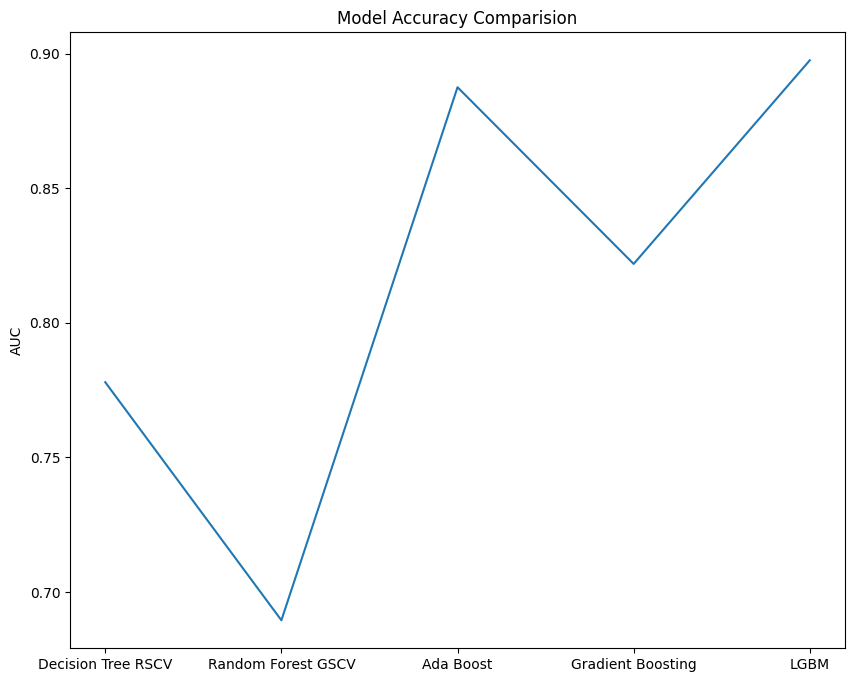

In [117]:
plt.figure(figsize=(10,8), dpi=100)
plt.plot(Model_EVAL.T.columns.T,Model_EVAL.T.iloc[5])
plt.ylabel('AUC')
plt.title('Model Accuracy Comparision')

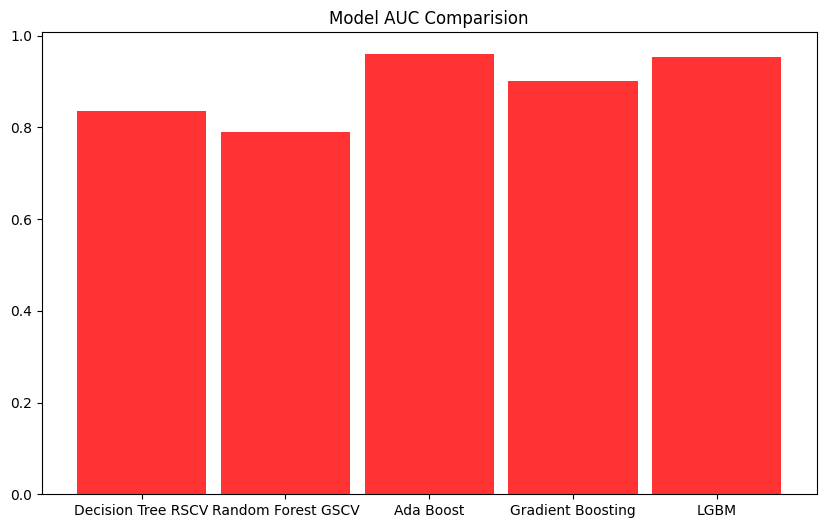

In [118]:
plt.figure(figsize=(10,6), dpi=100)
plt.bar(Model_EVAL.T.columns.T,Model_EVAL.T.iloc[6], width=0.9, alpha=0.8, color='red')
plt.xticks(Model_EVAL.T.columns)
plt.title('Model AUC Comparision')
plt.show()

In [119]:
xpos = np.array(list(range(len(Model_EVAL.T.columns))))
xpos

array([0, 1, 2, 3, 4])

In [120]:
df2 = Model_EVAL[['Accuracy','AUC','F1_Score','Recall']]

Text(0.5, 1.0, 'Comparison of all models')

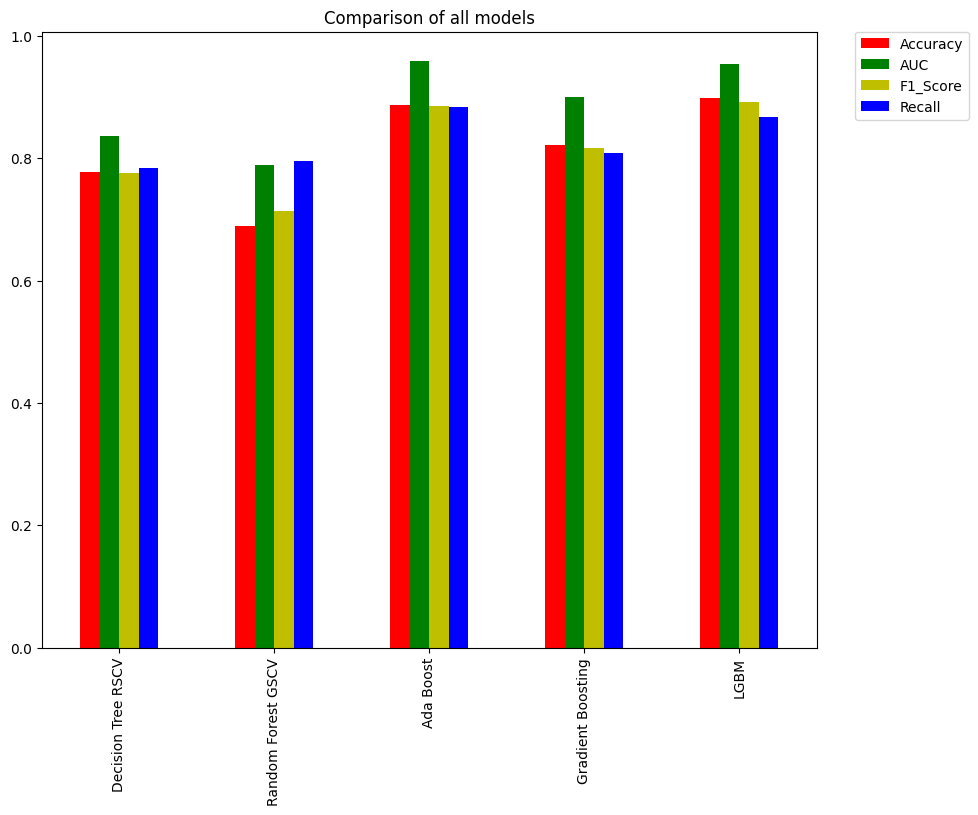

In [121]:
plt.rcParams['figure.figsize'] = (10, 8)
df2.plot(kind='bar', color=['r','g','y','b'])
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title("Comparison of all models")


Prediction of ten years risk of coronary heart disease is as important as predicting or diagnosing the disease in the medical field as it can save a person’s life by giving him precautions. So, the above prediction’s made have a significant impact on treatment. In this project, I have created various classification models of heart disease prediction using various machine learning classification algorithms and the algorithmic performance is analyzed.

I have compared the performances using the evaluation metrics like accuracy,precision, recall, AUC , F1 Score. Considering these factors, I can conclude that " LGBM RSCV and Gradient Boosting " algorithms are found to be more accurate in terms of accuracy value

model prediction lbgm

In [123]:
import pickle

In [124]:
with open('lgbm_model.pkl', 'wb') as file:
    pickle.dump(lgbm, file)

In [125]:
# Load the model
with open('lgbm_model.pkl', 'rb') as file:
    lgbm_loaded = pickle.load(file)

# You can now use lgbm_loaded to make predictions or further evaluate the model
# y_test_pred_loaded = lgbm_loaded.predict(X_test)
# y_test_prob_loaded = lgbm_loaded.predict_proba(X_test)[:, 1]

# # Calculate metrics for the loaded model
# roc_sc_test_loaded = roc_auc_score(y_test, y_test_prob_loaded)
# acc_test_loaded = accuracy_score(y_test, y_test_pred_loaded)
# f1_test_loaded = f1_score(y_test, y_test_pred_loaded)
# recall_test_loaded = recall_score(y_test, y_test_pred_loaded)
# prec_test_loaded = precision_score(y_test, y_test_pred_loaded)

# print("Loaded Model - Test Set: ")
# print("ROC Score: ", roc_sc_test_loaded)
# print("Accuracy Score: ", acc_test_loaded)
# print("F1 Score: ", f1_test_loaded)
# print("Recall: ", recall_test_loaded)
# print("Precision: ", prec_test_loaded)


In [128]:
inputdata=(1,	39,0,	0.0,	0,0	,106.0	,70.0	,26.97,80.0,77.0)
input_data_as_numpy_array=np.asarray(inputdata)
input_data_reshaped = input_data_as_numpy_array.reshape (1, -1)
prediction = lgbm_loaded.predict(input_data_reshaped)
print (prediction)

if (prediction[0] == 0):
    print( 'The person is not diabetic')
else:
    print( 'The person is diabetic')

[0]
The person is not diabetic
